![](https://adabul.com/wp-content/uploads/2020/04/diziler-360x240.jpg)

## **1. Описание датасета и задания**

Датасет с данными о 5000 фильмах, имеющих наибольший рейтинг на сайте IMDb (датасет выложен на платформе [Kaggle](https://www.kaggle.com/datasets/totoro29/imdb-movies)).

**Информация, содержащаяся в датасете:**
1.   ссылка на постер фильма (poster)
2.   наименование фильма (title)
3.   класс фильма по рейтингу the British Board of Film Classification (BBFC) (certificate)
4.   продолжительность фильма (runtime)
5.   жанр фильма (genre)
6.   рейтинг фильма на платформе IMBD (rating)
7.   описание сюжета фильма (about)
8.   кинорежиссер фильма (director)
9.   актеры-звезды фильма (stars)
10.  количество проголосовавших за фильм (votes)
11.  доход с фильма (gross_earn)



**ЗАДАЧА**

***1. Провести обзор и предобработку данных:***
* выполнить обзор данных
* оценить датасет на наличие дубликатов и обработать при необходимости
* оценить признаки на наличие пропусков и обработать при необходимости
* привести данные к необходимому типу для проведения анализа

***2. Провести анализ данных***
* Выполнить неграфический и графический анализ количественных признаков.
* Выполнить неграфический и графический анализ категориальных признаков.
* Выполнить анализ взаимосвязи двух количественных признаков.
* Выполнить анализ взаимосвязи двух категориальных признаков.
* Выполнить анализ взаимосвязи количественного и категориального признаков.

## **2. Загрузка датасета**

In [45]:
# при ошибке загрузки в текущей версии gdown необходимо его обновить
!pip install --upgrade gdown

In [46]:
!gdown --id 1SQihqE13h5sEVzLSaBn9f2l_FdMtxNQb

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1SQihqE13h5sEVzLSaBn9f2l_FdMtxNQb
To: /content/movies.csv
100% 1.89M/1.89M [00:00<00:00, 79.7MB/s]


In [47]:
import pandas as pd

In [48]:
dataset = pd.read_csv('movies.csv')

In [49]:
df = dataset.copy()

In [50]:
df.head(3)

,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn
0,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Shawshank Redemption,15,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,"('Tim Robbins',), ('Morgan Freeman',), ('Bob G...","26,26,905",$28.34M
1,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Dark Knight,12A,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,"('Christian Bale',), ('Heath Ledger',), ('Aaro...","25,98,173",$534.86M
2,https://m.media-amazon.com/images/S/sash/4Fyxw...,Inception,12A,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,Christopher Nolan,"('Leonardo DiCaprio',), ('Joseph Gordon-Levitt...","23,04,062",$292.58M


## **3. Оценка размеров датасета, наличия дубликатов и пропусков**

In [51]:
df.shape

(5000, 11)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   poster       5000 non-null   object 
 1   title        5000 non-null   object 
 2   certificate  5000 non-null   object 
 3   runtime      5000 non-null   object 
 4   genre        4970 non-null   object 
 5   rating       5000 non-null   float64
 6   about        4986 non-null   object 
 7   director     5000 non-null   object 
 8   stars        5000 non-null   object 
 9   votes        5000 non-null   object 
 10  gross_earn   4585 non-null   object 
dtypes: float64(1), object(10)
memory usage: 429.8+ KB


In [53]:
df.isnull().mean()*100

,0
poster,0.00
title,0.00
certificate,0.00
runtime,0.00
genre,0.60
rating,0.00
about,0.28
director,0.00
stars,0.00
votes,0.00


In [54]:
df.duplicated().sum()

0

In [55]:
df.duplicated(subset=['title']).sum()

109

In [56]:
df[df.duplicated(subset=['title', 'director'], keep=False)]


,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn
1873,https://m.media-amazon.com/images/S/sash/4Fyxw...,Funny Games,18,111 min,"Crime, Drama, Thriller",6.5,Two psychopathic young men take a family hosta...,Michael Haneke,"('Naomi Watts',), ('Tim Roth',), ('Michael Pit...","97,075",$1.29M
2675,https://m.media-amazon.com/images/S/sash/4Fyxw...,Funny Games,18,108 min,"Crime, Drama, Thriller",7.5,"Two violent young men take a mother, father, a...",Michael Haneke,"('Susanne Lothar',), ('Ulrich Mühe',), ('Arno ...","74,355",NaN
3900,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Vanishing,12,107 min,"Mystery, Thriller",7.7,"Rex and Saskia, a young couple in love, are on...",George Sluizer,"('Bernard-Pierre Donnadieu',), ('Gene Bervoets...","38,912",NaN
4627,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Vanishing,15,109 min,"Drama, Horror, Mystery",6.3,The boyfriend of an abducted woman never gives...,George Sluizer,"('Jeff Bridges',), ('Kiefer Sutherland',), ('N...","25,558",$14.54M


In [57]:
df[df.duplicated(subset=['title', 'runtime'], keep=False)]

,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn
1552,https://m.media-amazon.com/images/S/sash/4Fyxw...,Fright Night,15,106 min,"Comedy, Horror",6.4,"When a nice new neighbor moves in next door, C...",Craig Gillespie,"('Anton Yelchin',), ('Colin Farrell',), ('Davi...","1,05,916",$18.30M
2753,https://m.media-amazon.com/images/S/sash/4Fyxw...,Fright Night,18,106 min,"Fantasy, Horror",7.0,A teenager discovers that the newcomer in his ...,Tom Holland,"('Chris Sarandon',), ('William Ragsdale',), ('...","69,547",$24.92M
3153,https://m.media-amazon.com/images/S/sash/4Fyxw...,Black Sheep,15,87 min,"Comedy, Horror, Sci-Fi",5.8,An experiment in genetic engineering turns har...,Jonathan King,"('Oliver Driver',), ('Nathan Meister',), ('Tam...","40,759",$0.08M
3489,https://m.media-amazon.com/images/S/sash/4Fyxw...,Black Sheep,12,87 min,Comedy,6.2,A gubernatorial candidate hires a wormy specia...,Penelope Spheeris,"('Chris Farley',), ('David Spade',), ('Tim Mat...","40,830",$32.38M


In [58]:
df[df['gross_earn'].isnull() == True]

,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn
359,https://m.media-amazon.com/images/S/sash/4Fyxw...,It's a Wonderful Life,U,130 min,"Drama, Family, Fantasy",8.6,An angel is sent from Heaven to help a despera...,Frank Capra,"('James Stewart',), ('Donna Reed',), ('Lionel ...","4,49,869",NaN
525,https://m.media-amazon.com/images/S/sash/4Fyxw...,To Kill a Mockingbird,A,129 min,"Crime, Drama",8.3,"Atticus Finch, a widowed lawyer in Depression-...",Robert Mulligan,"('Gregory Peck',), ('John Megna',), ('Frank Ov...","3,14,344",NaN
547,https://m.media-amazon.com/images/S/sash/4Fyxw...,Death Proof,18,127 min,"Action, Thriller",7.0,Two separate sets of voluptuous women are stal...,Quentin Tarantino,"('Kurt Russell',), ('Zoë Bell',), ('Rosario Da...","2,89,321",NaN
751,https://m.media-amazon.com/images/S/sash/4Fyxw...,Planet Terror,18,105 min,"Action, Comedy, Fantasy",7.1,"After an experimental bio-weapon is released, ...",Robert Rodriguez,"('Rose McGowan',), ('Freddy Rodríguez',), ('Jo...","2,10,336",NaN
753,https://m.media-amazon.com/images/S/sash/4Fyxw...,Ip Man,15,106 min,"Action, Biography, Drama",8.0,"During the Japanese invasion of China, a wealt...",Wilson Yip,"('Donnie Yen',), ('Simon Yam',), ('Siu-Wong Fa...","2,23,019",NaN
...,...,...,...,...,...,...,...,...,...,...,...
4986,https://m.media-amazon.com/images/S/sash/4Fyxw...,In China They Eat Dogs,18,91 min,"Action, Comedy, Crime",7.3,"Two brothers, one cold and ruthless, the other...",Lasse Spang Olsen,"('Kim Bodnia',), ('Dejan Cukic',), ('Nikolaj L...","21,869",NaN
4988,https://m.media-amazon.com/images/S/sash/4Fyxw...,Havoc,18,85 min,"Crime, Drama",5.4,Two affluent suburban girls clash with the Lat...,Barbara Kopple,"('Anne Hathaway',), ('Bijou Phillips',), ('Shi...","19,327",NaN
4994,https://m.media-amazon.com/images/S/sash/4Fyxw...,Heist,15,93 min,"Action, Crime, Drama",6.1,A father is without the means to pay for his d...,Scott Mann,"('Robert De Niro',), ('Jeffrey Dean Morgan',),...","30,472",NaN
4996,https://m.media-amazon.com/images/S/sash/4Fyxw...,Playing It Cool,15,94 min,"Comedy, Romance",5.9,Unrequited love motivates a guy to write about...,Justin Reardon,"('Chris Evans',), ('Michelle Monaghan',), ('To...","28,515",NaN


**Выводы:**

В процессе исследования датасета можно сделать следующие выводы:

1.   В исследуемом датасете 55000 записей (5000 наблюдейний и 11 признаков)
2.   При изучении тепов данных датасета удалось выяснить, что данные по всем признакам кроме рейтинга ('rating') являются строками (object), у рейтинга тип данных число с плавающей точкой. На основании этого можно сделать вывод, что такой признак как количество проголосовавших за фильм (votes) нужно будет преобразовать к числовому типу, а именно int64. Еще можно предположит, что для дальнейшего исследования возможно будет необходимо привести типы данных таких признаков как продолжительность фильма ('runtime') и доход с фильма ('gross_earn') к int64, предварительно убрав лишние символы.
3.  Полных дубликатов у выборки нет, но при более детальном анализе выяснилось, что есть дубликаты по признаку наименование фильма ('title'). Если посмотреть с разрезе пар признаков, то видно что есть дубликаты в паре наименование фильма:продолжительность фильма (но в этих дубликатах абсолютно не совпадают все остальные признаки, поэтому принято решение не удалять их из выборки. Также есть дубликаты в паре наименование фильма:режисер, и тут уже видны приблизительно одинаковые значение по остальным признакам - описание практически одинаковое, длительность фильма, актерский состав, жанр. Можно сделать вывод, что данные задвоились (скорей всего на сайте IMDb было по два таких фильма). По этим данным принято решение удалить дубликаты, и так как в этих парах есть дубликаты с пропусками в признаке, то удалим именно эти записи (2675, 3900)
4. Из общей информации по датасету видно, что пропущенные значения есть в признаках: жанр фильма ('genre'), описание сюжета фильма ('about'), доход с фильма ('gross_earn'). Пропуски по первым двум признакам существенной роли не сыграют (они составляют менее 1% по каждому). Процент пропусков по признаку доход с фильма является более значимым (8,3%). Если задачи анализа данного датасета не будут зависить от этого признака, их можно оставить в данном состоянии, иначе выборку нужно будет отправить на доработку специалисту по сбору данных.
5. Возможными проблемами могут стать: наличие пропусков в признаке доход с фильма (если нужно будет делать анализ в контексте этого признака), дополнительная распаковка признака актеры-звезды фильма (например если потребуется составить сортироку по отдельным актерам), возможно наличие аномальных значений в каком-нибудь из признаков (для этого нужно более детально исследовать датасет)





In [59]:
df.drop(index=[2675, 3900], inplace=True)


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4998 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   poster       4998 non-null   object 
 1   title        4998 non-null   object 
 2   certificate  4998 non-null   object 
 3   runtime      4998 non-null   object 
 4   genre        4968 non-null   object 
 5   rating       4998 non-null   float64
 6   about        4984 non-null   object 
 7   director     4998 non-null   object 
 8   stars        4998 non-null   object 
 9   votes        4998 non-null   object 
 10  gross_earn   4585 non-null   object 
dtypes: float64(1), object(10)
memory usage: 468.6+ KB


## **4. Обработка колонок runtime и gross_earn: приведение к числовому типу**

### 4.1. runtime

In [61]:
df['runtime']

,runtime
0,142 min
1,152 min
2,148 min
3,139 min
4,154 min
...,...
4995,102 min
4996,94 min
4997,"Drama, Romance"
4998,92 min


In [62]:
df['runtime'].unique()

array(['142 min', '152 min', '148 min', '139 min', '154 min', '178 min',
       '136 min', '201 min', '175 min', '164 min', '179 min', '127 min',
       '143 min', '155 min', '140 min', '165 min', '169 min', '121 min',
       '118 min', '162 min', '153 min', '151 min', '195 min', '113 min',
       '130 min', '124 min', '122 min', '194 min', '132 min', '202 min',
       '138 min', '119 min', '189 min', '180 min', '137 min', '106 min',
       '111 min', '116 min', '145 min', '110 min', '98 min', '107 min',
       '126 min', '100 min', '131 min', '133 min', '103 min', '108 min',
       '96 min', '99 min', '115 min', '88 min', '120 min', '81 min',
       '135 min', '146 min', '117 min', '104 min', '92 min', '91 min',
       '102 min', '149 min', '170 min', '112 min', '101 min', '141 min',
       '144 min', '114 min', '150 min', '90 min', '161 min', '128 min',
       '93 min', '129 min', '166 min', '147 min', '134 min', '109 min',
       '105 min', '125 min', '156 min', '123 min', '95 min',

In [63]:
import re

In [64]:
def clear_runtime(runtime):
  return re.sub('\D+', '', runtime)


In [65]:
df['runtime'].apply(lambda x: clear_runtime(x))


,runtime
0,142
1,152
2,148
3,139
4,154
...,...
4995,102
4996,94
4997,
4998,92


In [66]:
df['runtime_clear'] = df['runtime'].apply(lambda x: clear_runtime(x))

In [67]:
df['runtime_clear'][4997]

''

In [68]:
df['runtime_clear']

,runtime_clear
0,142
1,152
2,148
3,139
4,154
...,...
4995,102
4996,94
4997,
4998,92


In [69]:
df['runtime_clear'].isna().sum()

0

In [70]:
df = df[df['runtime_clear']!='']

In [71]:
df.shape

(4968, 12)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4968 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   poster         4968 non-null   object 
 1   title          4968 non-null   object 
 2   certificate    4968 non-null   object 
 3   runtime        4968 non-null   object 
 4   genre          4968 non-null   object 
 5   rating         4968 non-null   float64
 6   about          4954 non-null   object 
 7   director       4968 non-null   object 
 8   stars          4968 non-null   object 
 9   votes          4968 non-null   object 
 10  gross_earn     4574 non-null   object 
 11  runtime_clear  4968 non-null   object 
dtypes: float64(1), object(11)
memory usage: 504.6+ KB


In [73]:
df['runtime_clear'] = df['runtime_clear'].astype('Int64')

<ipython-input-73-bda5fcc41bf4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['runtime_clear'] = df['runtime_clear'].astype('Int64')


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4968 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   poster         4968 non-null   object 
 1   title          4968 non-null   object 
 2   certificate    4968 non-null   object 
 3   runtime        4968 non-null   object 
 4   genre          4968 non-null   object 
 5   rating         4968 non-null   float64
 6   about          4954 non-null   object 
 7   director       4968 non-null   object 
 8   stars          4968 non-null   object 
 9   votes          4968 non-null   object 
 10  gross_earn     4574 non-null   object 
 11  runtime_clear  4968 non-null   Int64  
dtypes: Int64(1), float64(1), object(10)
memory usage: 509.4+ KB


### 4.2. gross_earn

In [75]:
df['gross_earn']

,gross_earn
0,$28.34M
1,$534.86M
2,$292.58M
3,$37.03M
4,$107.93M
...,...
4994,NaN
4995,$9.40M
4996,NaN
4998,$6.67M


In [76]:
df['gross_earn'].isna().sum()

394

In [77]:
import numpy as np

In [78]:
def clear_gross_earn(gross_earn):
  if pd.isna(gross_earn):
    return np.nan
  else:
    return re.sub('[^\d\.]', '', gross_earn)

In [79]:
df['gross_earn'] = df['gross_earn'].apply(lambda x: clear_gross_earn(x))

In [80]:
df['gross_earn']

,gross_earn
0,28.34
1,534.86
2,292.58
3,37.03
4,107.93
...,...
4994,NaN
4995,9.40
4996,NaN
4998,6.67


In [81]:
df['gross_earn_clear'] = df['gross_earn'].apply(lambda x: clear_gross_earn(x))

In [82]:
df['gross_earn_clear']

,gross_earn_clear
0,28.34
1,534.86
2,292.58
3,37.03
4,107.93
...,...
4994,NaN
4995,9.40
4996,NaN
4998,6.67


In [83]:
df['gross_earn_clear'] = df['gross_earn_clear'].astype('Float64')

In [84]:
df['gross_earn_clear']

,gross_earn_clear
0,28.34
1,534.86
2,292.58
3,37.03
4,107.93
...,...
4994,<NA>
4995,9.4
4996,<NA>
4998,6.67


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4968 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   poster            4968 non-null   object 
 1   title             4968 non-null   object 
 2   certificate       4968 non-null   object 
 3   runtime           4968 non-null   object 
 4   genre             4968 non-null   object 
 5   rating            4968 non-null   float64
 6   about             4954 non-null   object 
 7   director          4968 non-null   object 
 8   stars             4968 non-null   object 
 9   votes             4968 non-null   object 
 10  gross_earn        4574 non-null   object 
 11  runtime_clear     4968 non-null   Int64  
 12  gross_earn_clear  4574 non-null   Float64
dtypes: Float64(1), Int64(1), float64(1), object(10)
memory usage: 553.1+ KB


## **5. Оценка размеров датасета, выбор признаков для анализа**

In [86]:
dataset = df.copy()

In [87]:
dataset.head()

,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,runtime_clear,gross_earn_clear
0,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Shawshank Redemption,15,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,"('Tim Robbins',), ('Morgan Freeman',), ('Bob G...","26,26,905",28.34,142,28.34
1,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Dark Knight,12A,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,"('Christian Bale',), ('Heath Ledger',), ('Aaro...","25,98,173",534.86,152,534.86
2,https://m.media-amazon.com/images/S/sash/4Fyxw...,Inception,12A,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,Christopher Nolan,"('Leonardo DiCaprio',), ('Joseph Gordon-Levitt...","23,04,062",292.58,148,292.58
3,https://m.media-amazon.com/images/S/sash/4Fyxw...,Fight Club,18,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,David Fincher,"('Brad Pitt',), ('Edward Norton',), ('Meat Loa...","20,71,088",37.03,139,37.03
4,https://m.media-amazon.com/images/S/sash/4Fyxw...,Pulp Fiction,18,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"('John Travolta',), ('Uma Thurman',), ('Samuel...","20,11,013",107.93,154,107.93


In [88]:
dataset.shape

(4968, 13)

In [89]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4968 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   poster            4968 non-null   object 
 1   title             4968 non-null   object 
 2   certificate       4968 non-null   object 
 3   runtime           4968 non-null   object 
 4   genre             4968 non-null   object 
 5   rating            4968 non-null   float64
 6   about             4954 non-null   object 
 7   director          4968 non-null   object 
 8   stars             4968 non-null   object 
 9   votes             4968 non-null   object 
 10  gross_earn        4574 non-null   object 
 11  runtime_clear     4968 non-null   Int64  
 12  gross_earn_clear  4574 non-null   Float64
dtypes: Float64(1), Int64(1), float64(1), object(10)
memory usage: 553.1+ KB


**Признаки, которые будут использованы для дальнейшего анализа:**

***Количественные признаки:***
1.   Продолжительность фильма: runtime_clear
2.   Доход с фильма: gross_earn_clear

***Категориальные признаки:***
1.   Наименование фильма: title
2.   Класс фильма: certificate
3.   Жанр фильма: genre
4.   Рейтинг фильма: rating
5.   Кинорежиссер: director
6.   Актеры-звезды фильма: stars


## **6. Неграфический и графический анализ количественных признаков**

### *6.1. gross_earn_clear*

In [90]:
gross_earn = dataset['gross_earn_clear']

In [91]:
gross_earn

,gross_earn_clear
0,28.34
1,534.86
2,292.58
3,37.03
4,107.93
...,...
4994,<NA>
4995,9.4
4996,<NA>
4998,6.67


In [92]:
max_value = gross_earn.max()
min_value = gross_earn.min()
print('Наибольший доход: ', max_value, 'Наименьший доход: ', min_value)

Наибольший доход:  936.66 Наименьший доход:  0.0


In [93]:
dataset[dataset['gross_earn_clear']==0.0]


,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,runtime_clear,gross_earn_clear
868,https://m.media-amazon.com/images/S/sash/4Fyxw...,Mr. Nobody,15,141 min,"Drama, Fantasy, Romance",7.8,A boy stands on a station platform as a train ...,Jaco Van Dormael,"('Jared Leto',), ('Sarah Polley',), ('Diane Kr...","2,32,030",0.00,141,0.0
2631,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Condemned,18,114 min,"Action, Crime, Thriller",6.0,Jack Conrad is awaiting the death penalty in a...,Scott Wiper,"('Steve Austin',), ('Vinnie Jones',), ('Nathan...","52,430",0.00,114,0.0
2790,https://m.media-amazon.com/images/S/sash/4Fyxw...,Perfect Sense,15,92 min,"Drama, Romance, Sci-Fi",7.0,A chef and a scientist fall in love as an epid...,David Mackenzie,"('Ewan McGregor',), ('Eva Green',), ('Lauren T...","60,249",0.00,92,0.0
3053,https://m.media-amazon.com/images/S/sash/4Fyxw...,Wild Card,15,92 min,"Action, Crime, Drama",5.6,When a Las Vegas bodyguard with lethal skills ...,Simon West,"('Jason Statham',), ('Michael Angarano',), ('D...","55,803",0.00,92,0.0
3114,https://m.media-amazon.com/images/S/sash/4Fyxw...,Adam's Apples,R,94 min,"Comedy, Crime, Drama",7.7,A neo-Nazi sentenced to community service at a...,Anders Thomas Jensen,"('Ulrich Thomsen',), ('Mads Mikkelsen',), ('Ni...","50,694",0.00,94,0.0
3245,https://m.media-amazon.com/images/S/sash/4Fyxw...,Ginger Snaps,18,108 min,"Drama, Fantasy, Horror",6.8,"Two death-obsessed sisters, outcasts in their ...",John Fawcett,"('Emily Perkins',), ('Katharine Isabelle',), (...","47,082",0.00,108,0.0
3420,https://m.media-amazon.com/images/S/sash/4Fyxw...,Nothing But the Truth,15,108 min,"Crime, Drama",7.2,"In Washington, D.C., a reporter faces a possib...",Rod Lurie,"('Kate Beckinsale',), ('Matt Dillon',), ('Vera...","38,253",0.00,108,0.0
3738,https://m.media-amazon.com/images/S/sash/4Fyxw...,Flypaper,15,87 min,"Comedy, Crime, Mystery",6.3,A man caught in the middle of two simultaneous...,Rob Minkoff,"('Patrick Dempsey',), ('Ashley Judd',), ('Tim ...","33,003",0.00,87,0.0
3821,https://m.media-amazon.com/images/S/sash/4Fyxw...,Pusher,18,110 min,"Crime, Thriller",7.3,A drug pusher grows increasingly desperate aft...,Nicolas Winding Refn,"('Kim Bodnia',), ('Zlatko Buric',), ('Laura Dr...","39,929",0.00,110,0.0
4113,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Oxford Murders,15,108 min,"Adventure, Crime, Horror",6.1,"At Oxford University, a professor and a grad s...",Álex de la Iglesia,"('Elijah Wood',), ('John Hurt',), ('Leonor Wat...","29,257",0.00,108,0.0


In [94]:
dataset[dataset['gross_earn_clear']==0.0].shape

(16, 13)

In [95]:
percent_zero_gross_earn = len(dataset[dataset['gross_earn_clear']==0.0])/len(dataset)*100
percent_zero_gross_earn

0.322061191626409

In [96]:
gross_earn = dataset[dataset['gross_earn_clear']!=0.0]['gross_earn_clear']

In [97]:
len(gross_earn)

4558

In [98]:
max_value = gross_earn.max()
min_value = gross_earn.min()
print('Наибольший доход: ', max_value, 'Наименьший доход: ', min_value)

Наибольший доход:  936.66 Наименьший доход:  0.01


In [99]:
mean_value = gross_earn.mean()
print('Средний доход с фильма: ', mean_value)

Средний доход с фильма:  49.07882623957876


In [100]:
median_value = gross_earn.median()
print('Медиана доходов фильмов: ', median_value)

Медиана доходов фильмов:  28.345


In [101]:
percentile_10_value = gross_earn.quantile(0.1)
percentile_25_value = gross_earn.quantile(0.25)
percentile_50_value = gross_earn.quantile(0.5)
percentile_75_value = gross_earn.quantile(0.75)
percentile_90_value = gross_earn.quantile(0.9)
print('10-й процентиль доходов фильмов: ', percentile_10_value)
print('25-й процентиль доходов фильмов: ', percentile_25_value)
print('50-й процентиль доходов фильмов: ', percentile_50_value)
print('75-й процентиль доходов фильмов: ', percentile_75_value)
print('90-й процентиль доходов фильмов: ', percentile_90_value)

10-й процентиль доходов фильмов:  0.7970000000000005
25-й процентиль доходов фильмов:  7.0
50-й процентиль доходов фильмов:  28.345
75-й процентиль доходов фильмов:  63.04
90-й процентиль доходов фильмов:  121.96800000000002


In [102]:
gross_earn.describe()

,gross_earn_clear
count,4558.0
mean,49.078826
std,67.171717
min,0.01
25%,7.0
50%,28.345
75%,63.04
max,936.66


In [103]:
import matplotlib.pyplot as plt

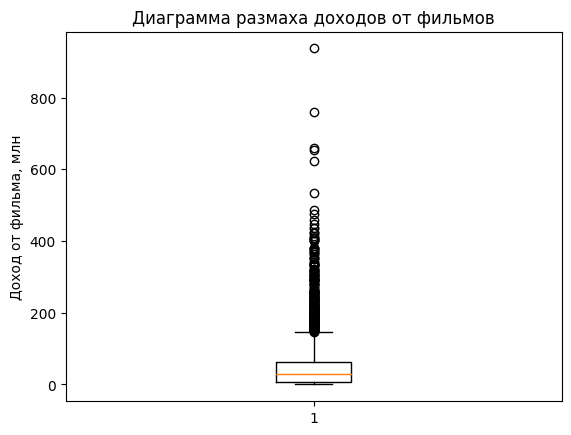

In [104]:
plt.boxplot(gross_earn)
plt.title('Диаграмма размаха доходов от фильмов')
plt.ylabel('Доход от фильма, млн')
plt.show()

In [105]:
gross_earn_without_na = gross_earn.dropna()


In [106]:
gross_earn_without_na

,gross_earn_clear
0,28.34
1,534.86
2,292.58
3,37.03
4,107.93
...,...
4992,6.24
4993,23.0
4995,9.4
4998,6.67


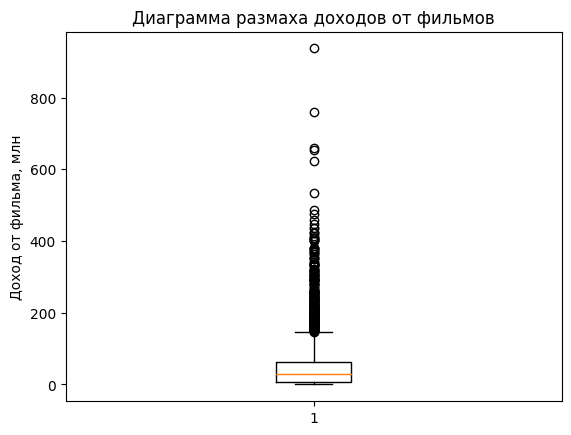

In [107]:
plt.boxplot(gross_earn_without_na)
plt.title('Диаграмма размаха доходов от фильмов')
plt.ylabel('Доход от фильма, млн')
plt.show()

In [108]:
# На графике видно, что в выборке присутствуют экстремальные значения.
# Избавимся от ним по методу ограничения графика данными, которые лежат выше,
# чем третий квартиль плюс три межквартильных расстояния

Q3, Q1 = np.percentile(gross_earn_without_na, [75, 25])
IQR = Q3 - Q1
gross_earn_without_na > (Q3 + 3*IQR)

,gross_earn_clear
0,False
1,True
2,True
3,False
4,False
...,...
4992,False
4993,False
4995,False
4998,False


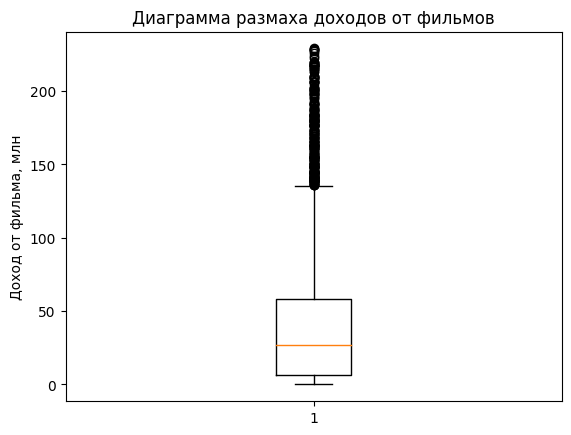

In [109]:
dt = gross_earn_without_na[gross_earn_without_na <= (Q3 + 3*IQR)]
plt.boxplot(dt)
plt.title('Диаграмма размаха доходов от фильмов')
plt.ylabel('Доход от фильма, млн')
plt.show()

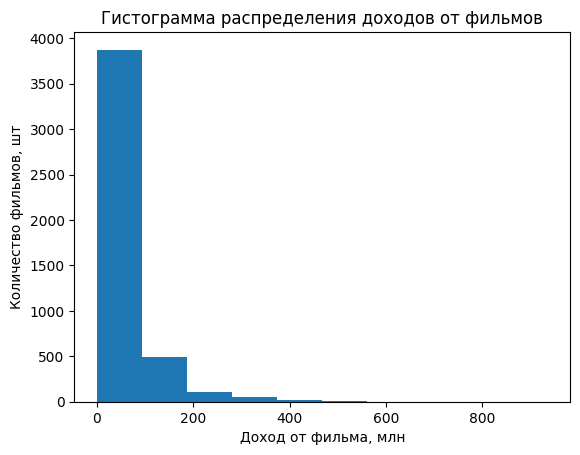

In [110]:
plt.hist(gross_earn_without_na)
plt.title('Гистограмма распределения доходов от фильмов')
plt.xlabel('Доход от фильма, млн')
plt.ylabel('Количество фильмов, шт')
plt.show()

In [111]:
# Гистограмма показывает, достаточно большой размах в данных, что подтверждается и показателями описательной статистики (min и max).
# Ограничим графический анализ 10 процентилем снизу и 90 процентилем сверху, тем самым обработав часть выбросов

gross_earn_2 = dataset[
    (dataset['gross_earn_clear']>=percentile_10_value)&
    (dataset['gross_earn_clear']<=percentile_90_value)]['gross_earn_clear']

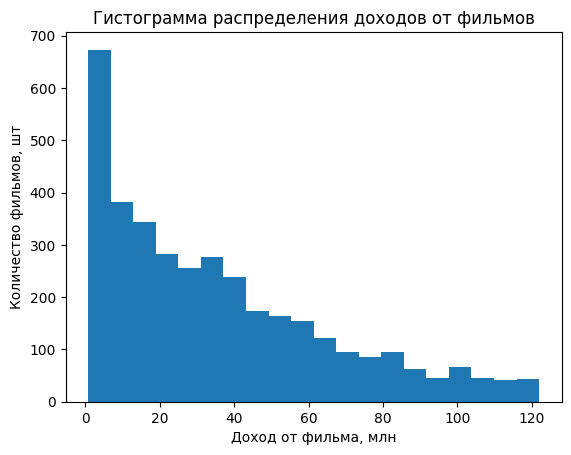

In [112]:
plt.hist(gross_earn_2, bins=20)
plt.title('Гистограмма распределения доходов от фильмов')
plt.xlabel('Доход от фильма, млн')
plt.ylabel('Количество фильмов, шт')
plt.show()

**Выводы:**


***1.   О максимальных и минимальных значениях признака (оцените размах значений).***
Максимальное значение показателя "доход с фильма" составляет 936.66 млн, а минимальное 0.00 млн.

***2.   О нулевых значениях (их наличие, нужна ли предобработка).***
Нулевых значений в признаке "доход с фильма не много - 16 шт, скорее всего они являются ошибочными. И так  как  это составляет  всего лишь 0.3% от общей выборки, то мы можем исключить эти данные из датасета, чтобы в  дальнейшем анализе не возникло неточностей. После удаления эти данных минимальное значение доходов с фильмов стало 0.01 млн

***3.   О средних величинах (среднее, медиана, их отличия, возможные причины).***
Средний доход с фильма составляет 49.08 млн, в то время как медианное значение - 28.35 млн. Значение среднего дохода смещено в большую сторону, что говорит о том, что в выборке есть несколько достаточно больших значений, существенно отличающихся от основной массы. Соответсвенно можно сделать выводы, что максимальное значение данного признака, скорей всего является выбросом или аномальным значением.

***4.   О процентилях (сколько процентов данных не превышают то или иное значение).***
Рассчитав значения процентилей, мы получили такие данные:
*   10% выборки не превышают значение 0,8 млн
*   25% выборки составляют значения до 7 млн
*   50% выборки разделяет датасет на значении 28.35 млн (что и является медианным значением по признаку)
*   75% выборки находится до 63.04 млн
*   90% выборки включают в себя величины до 123.97 млн

Из этого можно сделать выводы, что 50% всех исследуемых данных лежит в диапазоне от 7 млн до 63.04 млн (сюда же попадают медиана и среднее значения выборки). Также можно более уверенно можно предположить, что имеют место экстремальные значения, которые находятся за пределами 90го процентиля.

***5.   О результатах графического анализа (необходимость исключения выбросов, что показывает "ящик с усами", что показывает гистограмма).***
* Первоначальный графический анализ диаграммы размаха доходов от фильма ("ящик с усами") дает нам понимание того, что в признаке имеют место пропуски (так как диаграмма оказалась пустой). После исключения пустых значений, можно точно увидеть, что в данных существуют экстремальные значения и выбросы. Используя метод ограничения графика данными, которые лежат выше, чем третий квартиль плюс три межквартильных расстояния, видим, что за пределами усов всё еще есть выбросы, но их достаточно много и они находятся очень тесно друг с другом, поэтому эти данные мы оставляем в выборке. А вот экстремальные значения которые лежали дальше ограничительного значения можно удалить, как неинформативные. Диаграмма размаха доходов с фильма говорит нам о том, что основная масса фильмов имеет доход не более 60 млн
* Что касается гистрограммы распределения признака дохода с фильма, то график доказывает сделанные ранее предположения о наличии аномальных значениях лежащих за пределами 90го  процентиля. Так же можно убрать неинформативные данные находящиеся до 10го процентиля. Произведя двнные манипуляции, получаем более наглядную гистограмму, из которой можно сделать выводы, что больше всего фильмов с низким доходом. Тенденция такова, что чем больше доход с фильма, тем количество таких фильмов меньше.

### *6.2. runtime_clear*

In [113]:
#сохраним Series ['runtime_clear'] в переменную runtime
runtime = dataset['runtime_clear']
runtime

,runtime_clear
0,142
1,152
2,148
3,139
4,154
...,...
4994,93
4995,102
4996,94
4998,92


In [114]:
#Рассчитаем минимальное и максимальное значение продолжительности фильмов
max_value_runtime = runtime.max()
min_value_runtime = runtime.min()
print(f'Наибольшая продолжительность фильма: {max_value_runtime} мин; Наименьшая продолжительность фильма: {min_value_runtime} мин')

Наибольшая продолжительность фильма: 366 мин; Наименьшая продолжительность фильма: 45 мин


In [115]:
#Рассчитаем среднее и медианное значение продолжительности фильмов
mean_value_runtime = round(runtime.mean(),2)
median_value_runtime = round(runtime.median(),2)
print(f'Средняя продолжительность фильма: {mean_value_runtime} мин; Медианное значение продолжительности фильма: {median_value_runtime} мин')

Средняя продолжительность фильма: 110.27 мин; Медианное значение продолжительности фильма: 106.0 мин


In [116]:
#рассчитаем процентили (10,25,50,75,90)
percentile_5_value_runtime = runtime.quantile(0.05)
percentile_10_value_runtime = runtime.quantile(0.1)
percentile_25_value_runtime = runtime.quantile(0.25)
percentile_50_value_runtime = runtime.quantile(0.5)
percentile_75_value_runtime = runtime.quantile(0.75)
percentile_90_value_runtime = runtime.quantile(0.9)
percentile_95_value_runtime = runtime.quantile(0.95)
percentile_99_value_runtime = runtime.quantile(0.99)
print('5-й процентиль продолжительности фильмов: ', percentile_5_value_runtime)
print('10-й процентиль продолжительности фильмов: ', percentile_10_value_runtime)
print('25-й процентиль продолжительности фильмов: ', percentile_25_value_runtime)
print('50-й процентиль продолжительности фильмов: ', percentile_50_value_runtime)
print('75-й процентиль продолжительности фильмов: ', percentile_75_value_runtime)
print('90-й процентиль продолжительности фильмов: ', percentile_90_value_runtime)
print('95-й процентиль продолжительности фильмов: ', percentile_95_value_runtime)
print('99-й процентиль продолжительности фильмов: ', percentile_99_value_runtime)

5-й процентиль продолжительности фильмов:  85.0
10-й процентиль продолжительности фильмов:  89.0
25-й процентиль продолжительности фильмов:  96.0
50-й процентиль продолжительности фильмов:  106.0
75-й процентиль продолжительности фильмов:  120.0
90-й процентиль продолжительности фильмов:  135.0
95-й процентиль продолжительности фильмов:  148.0
99-й процентиль продолжительности фильмов:  183.65999999999985


In [117]:
#посмотрим показатели описательной статистики
runtime.describe()

,runtime_clear
count,4968.0
mean,110.26872
std,21.446129
min,45.0
25%,96.0
50%,106.0
75%,120.0
max,366.0


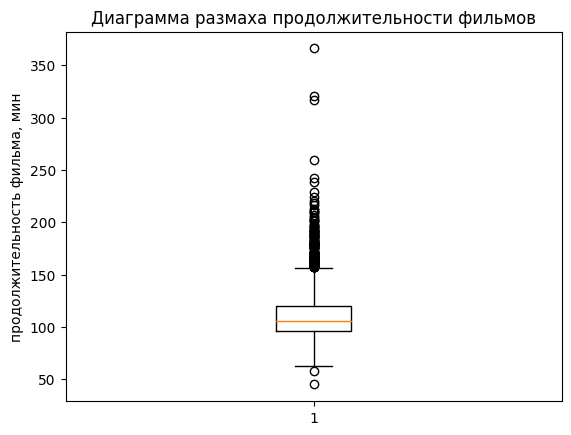

In [118]:
#рассмотрим диаграмму "ящик с усами" с помощью метода boxplot()
plt.boxplot(runtime)
plt.title('Диаграмма размаха продолжительности фильмов')
plt.ylabel('продолжительность фильма, мин')
plt.show()

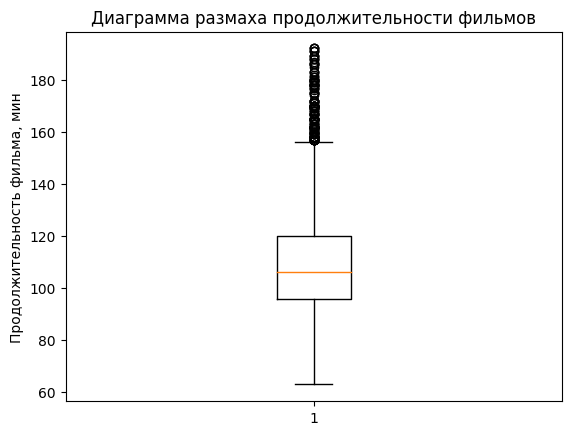

In [119]:
Q3, Q1 = np.percentile(runtime, [75, 25])
IQR = Q3 - Q1
df = dataset[
    (dataset['runtime_clear']>=(Q1 - 1.5*IQR))&
    (dataset['runtime_clear']<=(Q3 + 3*IQR))]['runtime_clear']
plt.boxplot(df)
plt.title('Диаграмма размаха продолжительности фильмов')
plt.ylabel('Продолжительность фильма, мин')
plt.show()

In [120]:
len(runtime[runtime>=(Q3 + 3*IQR)])

35

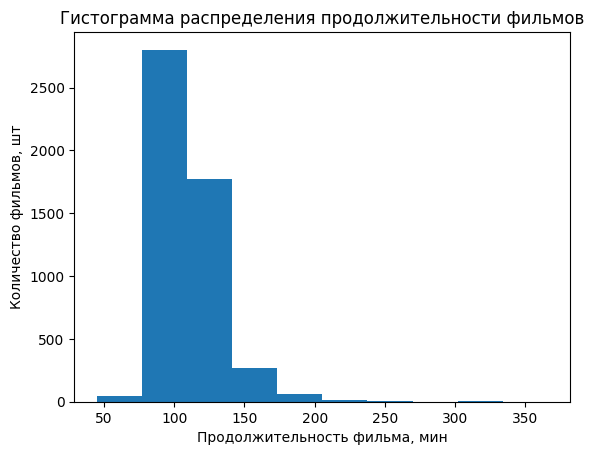

In [121]:
plt.hist(runtime)
plt.title('Гистограмма распределения продолжительности фильмов')
plt.xlabel('Продолжительность фильма, мин')
plt.ylabel('Количество фильмов, шт')
plt.show()

In [122]:
runtime_1 = dataset[
    (dataset['runtime_clear']>=percentile_5_value_runtime)&
    (dataset['runtime_clear']<=percentile_99_value_runtime)]['runtime_clear']

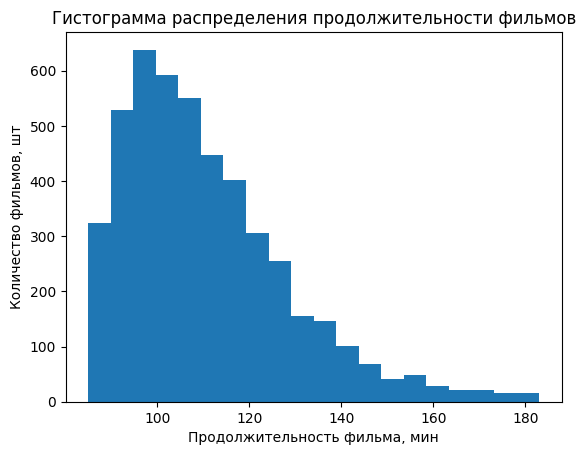

In [123]:
plt.hist(runtime_1, bins=20)
plt.title('Гистограмма распределения продолжительности фильмов')
plt.xlabel('Продолжительность фильма, мин')
plt.ylabel('Количество фильмов, шт')
plt.show()

**Выводы:**



***1.   О максимальных и минимальных значениях признака (оцените размах значений).***
Максимальное значение показателя "продолжительность фильма" составляет 366 мин, а минимальное 45 мин.

***2.   О нулевых значениях (их наличие, нужна ли предобработка).***
Нулевых значений в признаке "продолжительность фильма" нет, пропусков также нет

***3.   О средних величинах (среднее, медиана, их отличия, возможные причины).***
Средняя продолжительность фильма составляет 110 мин, в то время как медианное значение - 106 мин. Значения среднего и медианны практически одинаковы, что говорит о том, что данные в выборке равномерны, но небольшое отклонение среднего с большую сторону свидетельствует о том, что всетаки в исследуемых данных существуют незначительные выбросы.

***4.   О процентилях (сколько процентов данных не превышают то или иное значение).***
Рассчитав значения процентилей, мы получили такие данные:
*   5% выборки ограничиваются 85 минутами
*   10% выборки не превышают значение 89 мин
*   25% выборки составляют значения до 96 мин
*   50% выборки разделяет датасет на значении 106 мин (что и является медианным значением по признаку)
*   75% выборки находится до 120 мин
*   90% выборки включают в себя величины до 135 мин
*   95% выборки составляют значения до 148 мин
*   99% выборки это продолжительность до 184 мин

Из этого можно сделать выводы, что 50% всех исследуемых данных лежит в диапазоне от 96 мин до 120 мин (сюда же попадают медиана и среднее значения выборки). Также по этим данным можно сказать, что экстремальные значения и выбросы лежат за пределами 99го процентиля и до 5го процентиля.

***5.   О результатах графического анализа (необходимость исключения выбросов, что показывает "ящик с усами", что показывает гистограмма).***
* Построив диаграмму размаха продолжительности фильмов, сразу становится понятным, что пустых значений в выборке нет. Проанализировав график, можно сказать, что есть два выброса лежащие ниже левого "уса", и существуют выбросы далеко за верхними пределами графика. Избавившись от нижних выбросов, ограничив график левым "усом" (первый квартиль минус полтора межквартильных расстояния), а также применив метод ограничения графика данными, которые лежат выше, чем третий квартиль плюс три межквартильных расстояния, получаем график заканчивающийся приблизительно на 200 минутах. Для того чтобы убедиться какую часть значений мы убрали из рассмотрения, проверили количество данных за пределами третего квартиля плюс три межквартильных расстояния. Таких данных оказалось 35 шт, и при выборке в 4968 значений, их удаление не повлияет на качество анализа.

* Что касается гистрограммы распределения признака продолжительности фильма, то график доказывает сделанные ранее предположения о наличии аномальных значениях лежащих за пределами 99го  процентиля и до 5го процентиля. Произведя двнные манипуляции, получаем более наглядную гистограмму, из которой можно сделать выводы, что больше всего фильмов продолжительность которых от 1 до 2,5 часов. По графику также можно сказать, что чем длиннее фильм, тем таких фильмов меньше.

## **7. Неграфический и графический анализ категориальных признаков**

### *7.1. certificate*

In [124]:
dataset['certificate'].describe()

,certificate
count,4968
unique,15
top,15
freq,1843


In [125]:
dataset['certificate'].unique()

array(['15', '12A', '18', '12', 'PG', 'X', 'U', 'A', 'AA', 'UA', 'R',
       'PG-13', 'Not Rated', 'Rejected', '(Banned)'], dtype=object)

In [126]:
dataset['certificate'].value_counts()

,count
certificate,
15,1843
12A,788
18,658
PG,614
U,362
12,277
A,186
X,134
AA,59


In [127]:
certificate_counts = dataset['certificate'].value_counts().sort_values(ascending=True)

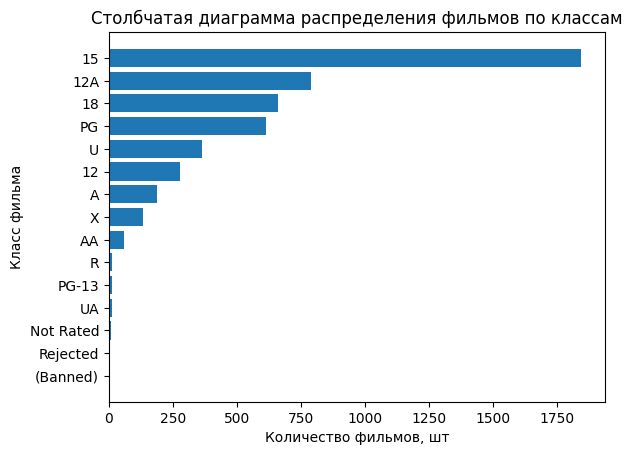

In [128]:
plt.barh(certificate_counts.index, certificate_counts.values)
plt.title('Столбчатая диаграмма распределения фильмов по классам')
plt.ylabel('Класс фильма')
plt.xlabel('Количество фильмов, шт')
plt.show()

In [129]:
certificate_counts_top_5 = dataset['certificate'].value_counts()[:5]

In [130]:
certificate_counts_top_5.index

Index(['15', '12A', '18', 'PG', 'U'], dtype='object', name='certificate')

In [131]:
labels_certificate_counts_top_5 = ['класс '+item for item in certificate_counts_top_5.index]
labels_certificate_counts_top_5

['класс 15', 'класс 12A', 'класс 18', 'класс PG', 'класс U']

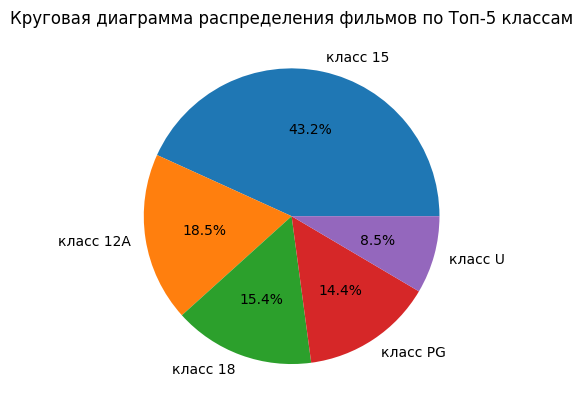

In [132]:
plt.pie(certificate_counts_top_5, labels=labels_certificate_counts_top_5, autopct='%.1f%%')
plt.title('Круговая диаграмма распределения фильмов по Топ-5 классам')
plt.show()

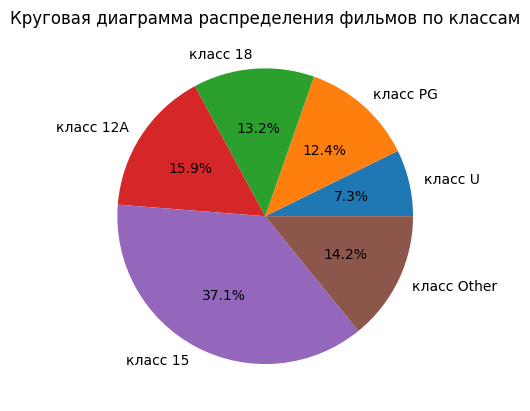

In [133]:
other_certificates = certificate_counts[certificate_counts<300]
certificate_counts_and_other = certificate_counts[certificate_counts>300]
certificate_counts_and_other['Other'] = other_certificates.sum()
labels_certificate_counts_and_other = ['класс '+item for item in certificate_counts_and_other.index]
plt.pie(certificate_counts_and_other, labels=labels_certificate_counts_and_other, autopct='%.1f%%')
plt.title('Круговая диаграмма распределения фильмов по классам')
plt.show()

**Выводы:**

***1.   О количестве уникальных значений признака.***
Проанализировав данные, можно сказать, что уникальных значений классов фильмов представлено 15 шт

***2.   О наиболее часто встречаемом значении признака (что за значение, сколько раз встретилось).***
Наиболее часто встречающееся значение класса фильмов по рейтингу BBFC - "15", фильмов с таким классом 1843 шт

***3.   О распределении значений признака (наиболее встречаемые, наименее встречаемые).***
Проведя неграфический структурный анализ классов фильмов можно сказать, что наиболее встречающиеся значения классов - "15", "12А", "18", "PG", "U". Меньше всего фильмов с классами - "PG-13", "UA", "R", "AA", также в отдельную группу можно отнести фильмы с классами "Banned", "Rejected", "Not Rated", в связи с тем, что такого рейтинга по классификации BBFC не существует

***4.   О результатах графического анализа определенного топ признака (что показывает столбчатая и круговая диаграммы).***
На основании графического анализа (столбчатой диаграммы) можно сделать выводы, что топ-5 классов составляют очень большую часть всех данных, поэтому более детально целесообразно рассматривать именно их. Построив круговую диаграмму по этим топ-5 классам и проанализировав ее, можно сказать, что класс "15" составляет 43.2% от количества фильмов из топ-5, остальные четыре класса составляют меньше 20% каждый ("12А"-18.5%, "18"-15.4%, "PG"-14.4%, "U"-8.5%). При дополнительном анализе круговой диаграммы по всем данным выборки можно увидеть, что доля класса "15" во всем датасете составляет 37.1% (остальные классы из Топ-5 изменились не существенно, значения стали на 2-3% ниже), в то время как остальные классы, объединенные в "Other" составили 14.2%


### *7.2. rating*

In [134]:
dataset['rating'].describe()

,rating
count,4968.000000
mean,6.693639
std,0.967967
min,1.500000
25%,6.100000
50%,6.800000
75%,7.400000
max,9.300000


In [135]:
dataset['rating'].unique()

array([9.3, 9. , 8.8, 8.9, 8.7, 9.2, 8.4, 8.6, 8. , 8.5, 8.2, 7.8, 8.3,
       8.1, 7.9, 7.2, 7.6, 7.7, 7.1, 7.4, 7. , 6.5, 7.3, 6.9, 7.5, 6.6,
       6.8, 6.2, 6.4, 6.7, 5.3, 6.1, 5.9, 6.3, 5.8, 5.7, 5.6, 5.5, 4.7,
       4.1, 6. , 5.4, 3.7, 5. , 5.2, 4.9, 4.8, 4. , 4.3, 5.1, 4.6, 2.4,
       2.8, 3.4, 4.5, 1.9, 2.5, 3.9, 3.3, 4.4, 2.6, 3.5, 4.2, 3.8, 2.2,
       3.6, 2.1, 3. , 2.9, 1.5, 3.1, 2.3])

In [136]:
len(dataset['rating'].unique())

72

In [137]:
dataset['rating'].value_counts()

,count
rating,
6.7,221
6.4,218
6.6,209
7.2,207
7.0,206
...,...
9.3,1
2.1,1
2.2,1


In [138]:
rating_counts = dataset['rating'].value_counts().iloc[:5]
rating_counts

,count
rating,
6.7,221
6.4,218
6.6,209
7.2,207
7.0,206


In [139]:
rating_counts = dataset['rating'].value_counts().sort_values()

In [140]:
rating_counts.head(7)

,count
rating,
2.3,1
1.5,1
9.3,1
8.9,1
2.2,1
2.1,1
2.9,2


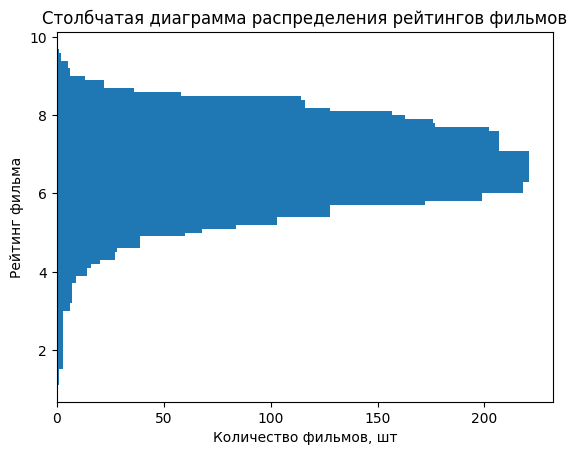

In [141]:
plt.barh(rating_counts.index, rating_counts.values)
plt.title('Столбчатая диаграмма распределения рейтингов фильмов')
plt.ylabel('Рейтинг фильма')
plt.xlabel('Количество фильмов, шт')
plt.show()

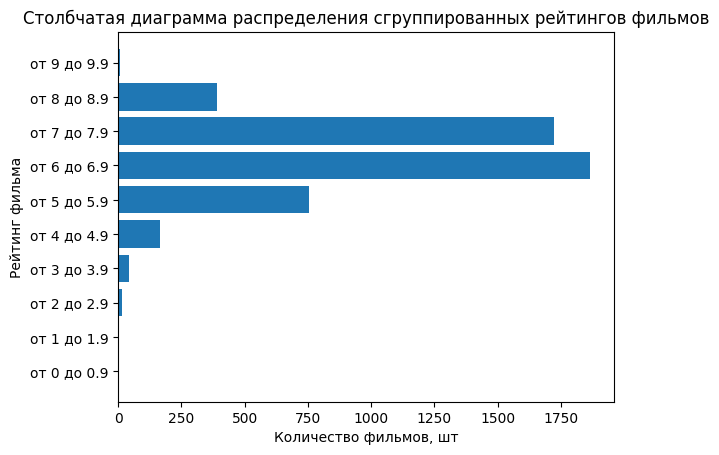

In [142]:

rating_groply = rating_counts.sort_index()[0:0.9]
i=0
while i<10:
  rating_groply['от '+str(i)+' до '+str(i+0.9)] = rating_counts.sort_index()[i:i+0.9].sum()
  i +=1
labels_rating_groply = rating_groply.index
plt.barh(rating_groply.index, rating_groply.values)
plt.title('Столбчатая диаграмма распределения сгруппированных рейтингов фильмов')
plt.ylabel('Рейтинг фильма')
plt.xlabel('Количество фильмов, шт')
plt.show()

In [143]:
rating_groply

,count
rating,
от 0 до 0.9,0
от 1 до 1.9,4
от 2 до 2.9,14
от 3 до 3.9,42
от 4 до 4.9,164
от 5 до 5.9,755
от 6 до 6.9,1866
от 7 до 7.9,1723
от 8 до 8.9,392


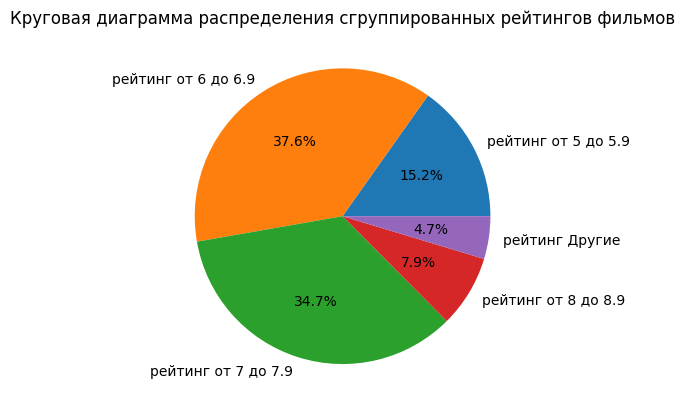

In [144]:
other_rating_groply = rating_groply[rating_groply<200]
rating_groply_with_other = rating_groply[rating_groply>200]
rating_groply_with_other['Другие'] = other_rating_groply.sum()
labels_rating_groply_with_other = ['рейтинг '+item for item in rating_groply_with_other.index]
plt.pie(rating_groply_with_other, labels=labels_rating_groply_with_other, autopct='%.1f%%')
plt.title('Круговая диаграмма распределения сгруппированных рейтингов фильмов')
plt.show()

**Выводы:**

***1.   О количестве уникальных значений признака.***
Проанализировав данные, можно сказать, что уникальных значений рейтинга фильмов представлено 72 шт.

***2.   О наиболее часто встречаемом значении признака (что за значение, сколько раз встретилось).***
Наиболее часто встречающееся значение рейтинга фильмов - 6.7, фильмов с таким рейтингом 221 шт

***3.   О распределении значений признака (наиболее встречаемые, наименее встречаемые).***
Проведя неграфический структурный анализ рейтингов фильмов можно сказать, что наиболее встречающиеся рейтинги - 6.7 (221 фильм), 6.4 (218 фильмов), 6.6 (209 фильмов), 7.2 (207 фильмов), 7.0 (206 фильмов). Меньше всего фильмов с рейтингами 1.5, 2.2, 2.1, 8.9, 2.3, 9.3, фильмов с таким рейтингом всего лишь по 1шт.

***4.   О результатах графического анализа определенного топ признака (что показывает столбчатая и круговая диаграммы).***
На основании графического анализа (столбчатой диаграммы) можно сделать выводы, что больше всего фильмов с рейтингом в интервале от 5.0 до 8.5. Более четко сказать невозможно, потому что уникальных значений рейтингов слишком много. Для более подробного анализа было принято решение разделить рейтинги на 10 групп, тем самым сделать признак однозначно категориальным и более анализируемым (в дальнейшем будум делать анализ согласно этим группам). И уже про столбчатой диаграмме сгруппированных рейтингов можно сказать, что больше всего фильмов имеют рейтинг от 6.0 до 7.0. В Топ-3 входят такие группы: 6.0-7.0, 7.0-8.0, 5.0-6.0. При анализа  круговой диаграммы можно увидеть как группы рейтингов распределены в процентом соотношении: 6.0-7.0 - 37.9%, 7.0-8.0 - 33.7% - вместе они составляют больше 70%, 5.0-6.0 - 16.0%, остальные рейтинги составляют меньше 10% каждый (8.0-9.0 - 7.3%, 4.0-5.0 - 3.7%, все оставшиеся - 1.4%).






### *7.3. director*

In [145]:
dataset['director'].describe()

,director
count,4968
unique,1954
top,Woody Allen
freq,38


In [146]:
dataset['director'].unique()

array(['Frank Darabont', 'Christopher Nolan', 'David Fincher', ...,
       'Stan Dragoti', 'Paul Schrader', 'Justin Reardon'], dtype=object)

In [147]:
dataset['director'].value_counts()

,count
director,
Woody Allen,38
Steven Spielberg,27
Clint Eastwood,27
Alfred Hitchcock,24
Ridley Scott,21
...,...
Yann Demange,1
Bruce A. Evans,1
James Gartner,1


In [148]:
director_counts = dataset['director'].value_counts().sort_values(ascending=True)

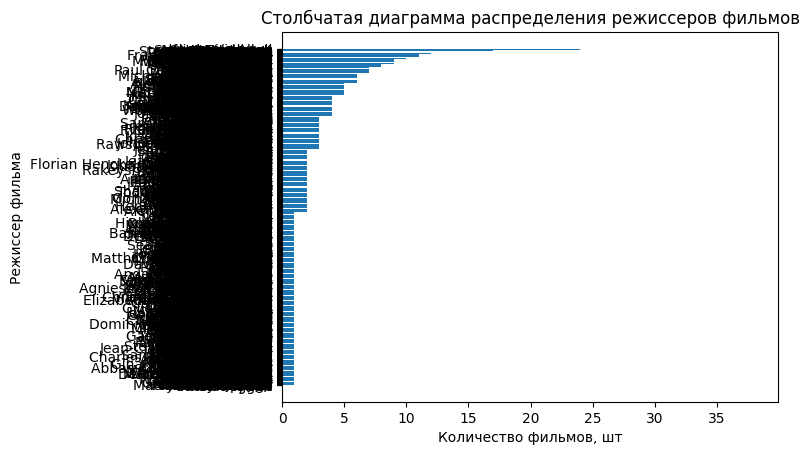

In [149]:
plt.barh(director_counts.index, director_counts.values)
plt.title('Столбчатая диаграмма распределения режиссеров фильмов')
plt.ylabel('Режиссер фильма')
plt.xlabel('Количество фильмов, шт')
plt.show()

In [150]:
director_counts[director_counts==1].sum()

1006

In [151]:
director_counts_top_18 = dataset['director'].value_counts()[:18]
director_counts_top_18 = director_counts_top_18.sort_values(ascending=True)
director_counts_top_18

,count
director,
Richard Donner,14
Barry Levinson,14
Oliver Stone,14
David Cronenberg,15
Tony Scott,15
Brian De Palma,15
Robert Zemeckis,15
Joel Schumacher,16
Steven Soderbergh,17


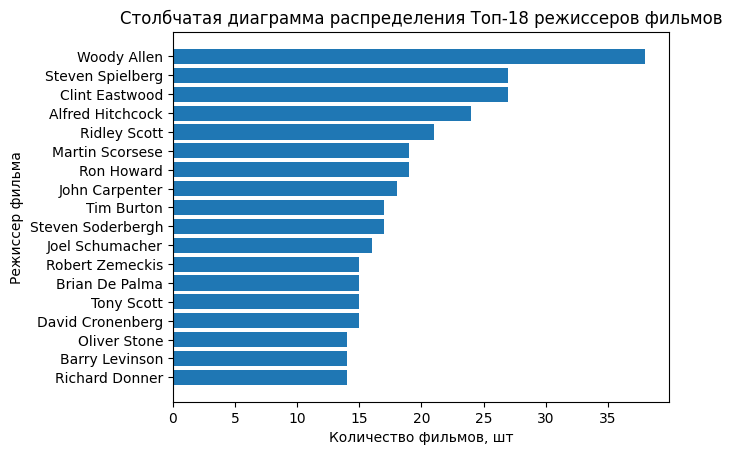

In [152]:
plt.barh(director_counts_top_18.index, director_counts_top_18.values)
plt.title('Столбчатая диаграмма распределения Топ-18 режиссеров фильмов')
plt.ylabel('Режиссер фильма')
plt.xlabel('Количество фильмов, шт')
plt.show()

In [153]:
director_counts_top_5 = dataset['director'].value_counts()[:5]
director_counts_top_5 = director_counts_top_5.sort_values(ascending=True)
director_counts_top_5

,count
director,
Ridley Scott,21
Alfred Hitchcock,24
Steven Spielberg,27
Clint Eastwood,27
Woody Allen,38


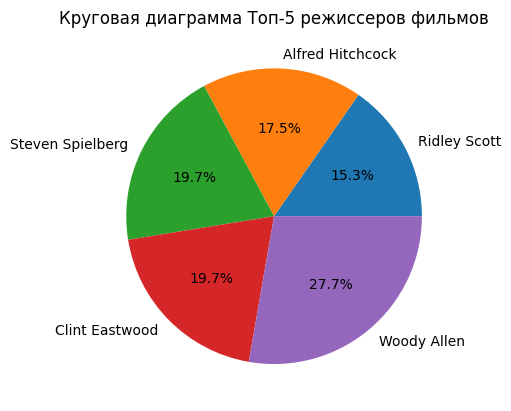

In [154]:
plt.pie(director_counts_top_5, labels=director_counts_top_5.index, autopct='%.1f%%')
plt.title('Круговая диаграмма Топ-5 режиссеров фильмов')
plt.show()

**Выводы:**

***1.   О количестве уникальных значений признака.***
Проанализировав данные, можно сказать, что уникальных значений режиссеров фильмов представлено 1954 шт

***2.   О наиболее часто встречаемом значении признака (что за значение, сколько раз встретилось).***
Наиболее часто встречающееся значение режиссеров фильмов - Woody Allen, фильмов снятым этим режиссером - 38 шт

***3.   О распределении значений признака (наиболее встречаемые, наименее встречаемые).***
Проведя неграфический структурный анализ режиссеров фильмов можно сказать, что наиболее встречающиеся значения - Woody Allen (38 фильма), Clint Eastwood (27 фильмов), Steven Spielberg (27 фильмов), Alfred Hitchcock (24 фильмов), Ridley Scott (21 фильмов). Также мы выяснили, что в выборке представлено большое количество режиссеров, которые сняли только по одному фильму (1006 чел).

***4.   О результатах графического анализа определенного топ признака (что показывает столбчатая и круговая диаграммы).***
В связи с наличием огромного количества уникальных значений анализируемого признака изначальная столбчатая диаграмма никакой информации нам не дала. Поэтому было принято решение рассматривать 18 самых часто встречающихся режиссеров выборки. У всех этих режиссеров представлено более 14 фильмов, больше всего у Woody Allen (38 фильма), по 14 фильмов у Richard Donner, Barry Levinson и Oliver Stone. Для анализа круговой диаграммы были отобраны Топ-5 режиссеров. Процентное соотношение этих режиссеров распределилось таким образом: Woody Allen - 27.7%, Clint Eastwood - 19.7%, Steven Spielberg - 19.7%, Alfred Hitchcock - 17.5%, Ridley Scott -15.3%.

## **8. Анализ взаимосвязи двух количественных признаков**

### *8.1. runtime_clear - gross_earn_clear*

In [155]:
import seaborn as sns

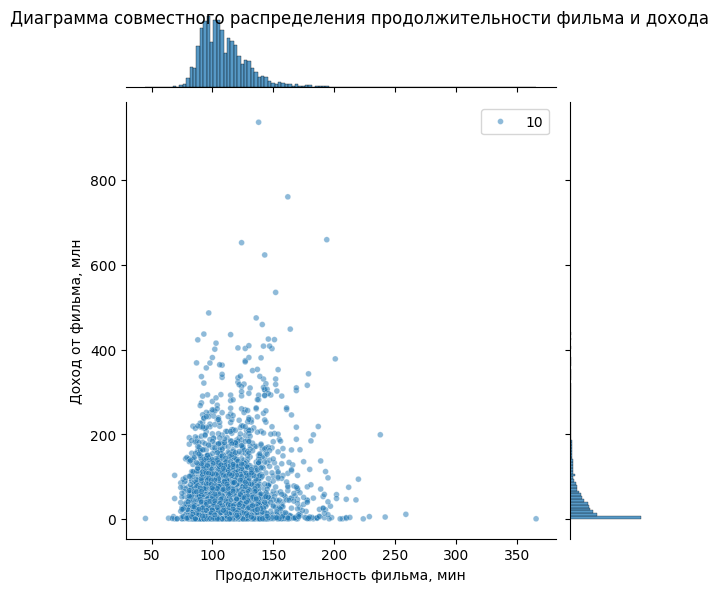

In [156]:
sns.jointplot(x=dataset['runtime_clear'], y=dataset['gross_earn_clear'], size=10, alpha=0.5)
plt.suptitle('Диаграмма совместного распределения продолжительности фильма и дохода')
plt.ylabel('Доход от фильма, млн')
plt.xlabel('Продолжительность фильма, мин')
plt.show()

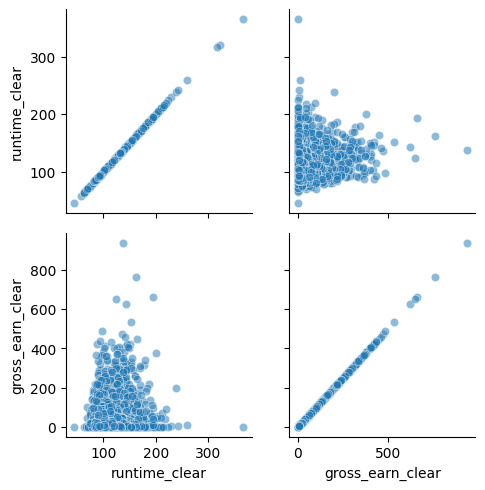

In [157]:
columns = ['runtime_clear', 'gross_earn_clear']
g = sns.PairGrid(dataset[columns])
g.map(sns.scatterplot, alpha=0.5)


In [158]:
new_dataset = dataset
for col in columns:
  limiter = new_dataset[columns].quantile(0.99)
  new_dataset = new_dataset[new_dataset[columns]<=limiter]

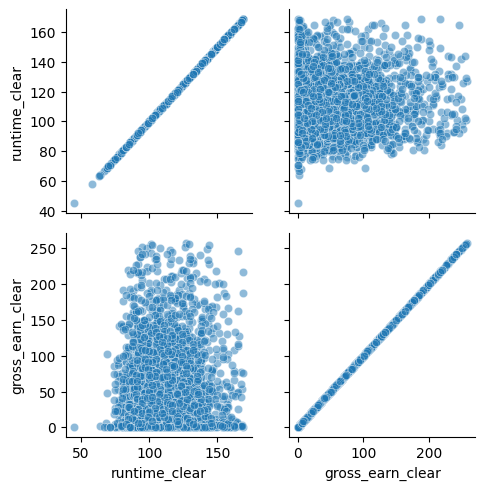

In [159]:
g = sns.PairGrid(new_dataset[columns])
g.map(sns.scatterplot, alpha=0.5)

**Выводы:**

***1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, какая взаимосвязь (линейная, нелинейная)).***
Из графиков видно, что какой-то четкой взаимосвязи выручки фильма от его продолжительности не существует. Никаких определенных смещений  данных в какую-либо сторону не просматривается.


## **9. Анализ взаимосвязи двух категориальных признаков**

### *9.1. director - certificate*

In [160]:
directors = dataset['director'].unique()
len(directors)

1954

In [161]:
dataset['director'].value_counts()

,count
director,
Woody Allen,38
Steven Spielberg,27
Clint Eastwood,27
Alfred Hitchcock,24
Ridley Scott,21
...,...
Yann Demange,1
Bruce A. Evans,1
James Gartner,1


In [162]:
directors_top_5 = dataset['director'].value_counts()[:5].index
directors_top_5

Index(['Woody Allen', 'Steven Spielberg', 'Clint Eastwood', 'Alfred Hitchcock',
       'Ridley Scott'],
      dtype='object', name='director')

In [163]:
labels = dataset['certificate'].unique()
colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))
colors

{'15': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 '12A': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 '18': (1.0, 0.4980392156862745, 0.054901960784313725),
 '12': (1.0, 0.7333333333333333, 0.47058823529411764),
 'PG': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'X': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 'U': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'A': (1.0, 0.596078431372549, 0.5882352941176471),
 'AA': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'UA': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 'R': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'PG-13': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 'Not Rated': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'Rejected': (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 '(Banned)': (0.4980392156862745, 0.4980392156862745, 0.49803

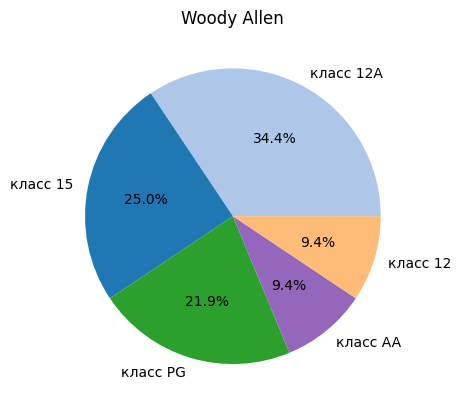

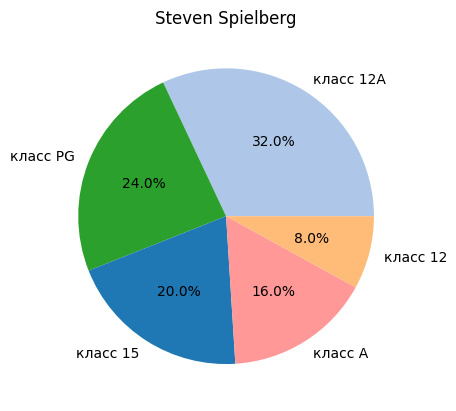

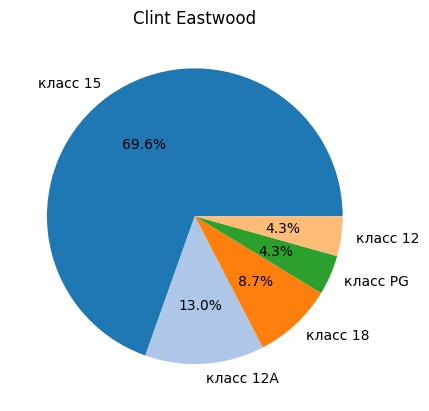

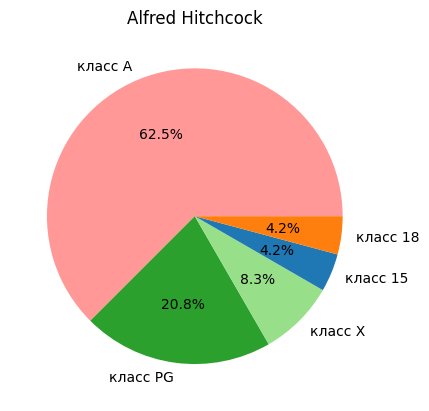

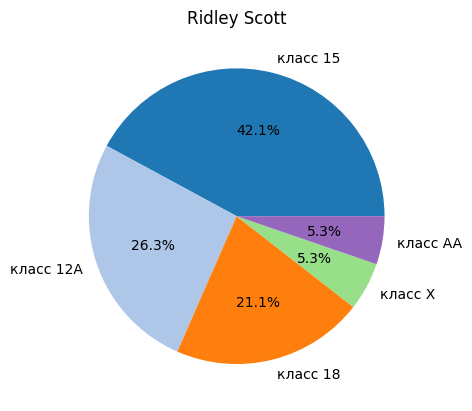

In [164]:
for director in directors_top_5:
  df = dataset[dataset['director']==director]

  certificate_counts = df['certificate'].value_counts()[:5]
  labels = certificate_counts.index
  labels_certificate = ['класс '+item for item in labels]

  plt.title(director)
  plt.pie(certificate_counts.values, labels=labels_certificate, colors=[colors[key] for key in labels], autopct='%.1f%%')
  plt.show()

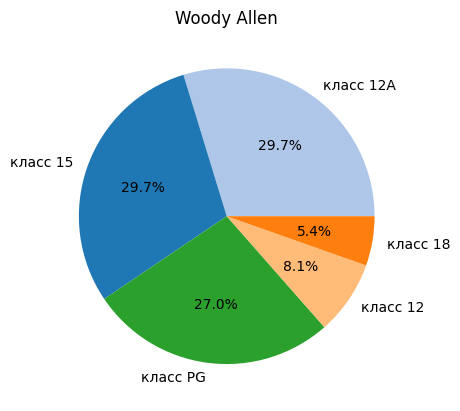

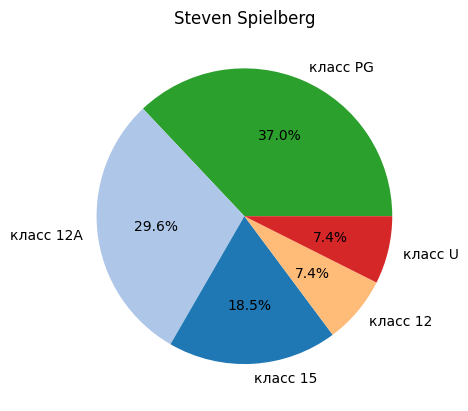

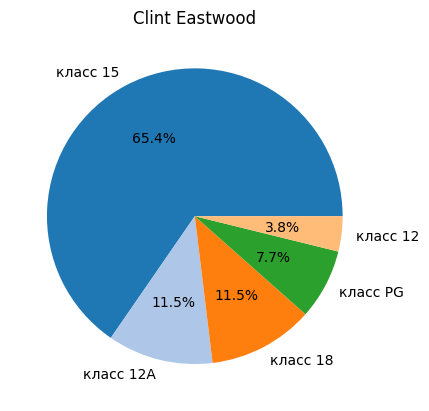

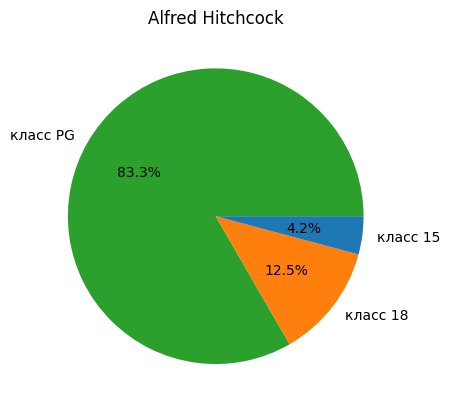

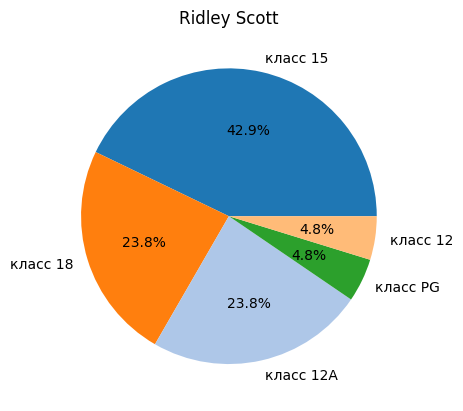

In [165]:
dataset_copy_unify_certificate = dataset.copy()

dataset_copy_unify_certificate['certificate'] = dataset_copy_unify_certificate['certificate'].str.replace('12A', '12_par')
dataset_copy_unify_certificate['certificate'] = dataset_copy_unify_certificate['certificate'].str.replace('AA', '15')
dataset_copy_unify_certificate['certificate'] = dataset_copy_unify_certificate['certificate'].str.replace('A', 'PG')
dataset_copy_unify_certificate['certificate'] = dataset_copy_unify_certificate['certificate'].str.replace('X', '18')
dataset_copy_unify_certificate['certificate'] = dataset_copy_unify_certificate['certificate'].str.replace('12_par', '12A')
dataset_copy_unify_certificate['certificate'].unique()


directors_top_5 = dataset_copy_unify_certificate['director'].value_counts()[:5].index

for director in directors_top_5:
  df = dataset_copy_unify_certificate[dataset_copy_unify_certificate['director']==director]

  certificate_counts = df['certificate'].value_counts()[:5]
  labels = certificate_counts.index
  labels_certificate = ['класс '+item for item in labels]

  plt.title(director)
  plt.pie(certificate_counts.values, labels=labels_certificate, colors=[colors[key] for key in labels], autopct='%.1f%%')
  plt.show()

**Выводы:**

***1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, похожи ли распределения признаков).***
Проанализировав круговые диаграммы взаимосвязи признаков "режиссер"
 и "класс рейтинга" можно сказать, что четкой взаимосвязи между признаками нет. В ходе анализа было выявлено, что классы рейтинга в выборке указаны как действующие, так и те которые использовались ранее, и в определенный момент были заменены новыми. Было принято решение, привести классы к единой современной классификации, а именн сделать следующие замены: 'AA'->'15', 'A'->'PG', 'X'->'18'. После этих преобразований и построения новых диаграмм, можно сделать выводы, что в Топ-3 классов всех режиссеров есть классы "15"(для детей старше 15 лет) и "12А"(для детей до 12 лет в присутствии взрослых) ("12А" кроме Alfred Hitchcock). Также класс рейтинга "U"(для всех) в Топ-5 классов попали фильмы только режиссера Steven Spielberg. Единственной взаимосвязью между всем Топ-5 режиссеров является то, что у всех в Топ-5 классов есть класс рейтинга "15"(для детей старше 15 лет) и "PG"(для просмотра в присутствии взрослых), но в разном процентном соотношении. Процент самого значительного по вхождению класса для всех режиссеров разный, соответсвенно взаимосвязи однозначной нет.

***2.   Об особенностях распределения признака в разрезе основного признака (что характерно для каждого значения основного признака)***
Что касается особенностей распределения признака "класса" в разрезе признака "режиссер", то можно описать следующую ситуацию:
* *Woody Allen*: преобладают классы "12A"(29,7%), "15"(29,7%), "PG"(27%), также присутсвуют классы "12"(8,1%) и "18"(5,4%)
* *Clint Eastwood*: доминирующим классом является "15"(65.4%), классы "12А" и "18" составляют по 11.5%, также в топ-5 попали классы "PG"(7,7%) и "12"(3,8%)
* *Steven Spielberg*: явного лидирования какого-то класса нет, "PG"(37%), "12А"(29,6%), "15"(18,5%), "12"(7,4%) и "U"(7,4%) - из всех топ-5 режиссеров, только у Steven Spielberg есть этот класс.
* *Alfred Hitchcock*: у этого режиссера есть значительное преоюладание класса "PG"(83,3%) - из всех режиссеров, это самый большой процент распределения классов, также присутствуют классы "18"(12,5%) и "15"(4,2%). Также это единственный режиссер у которого в Топ-классах всего три показателя
* *Ridley Scott*: почти половину классов составляет "15"(42,9%), классы "18" и "12А" занимают по 23,8%, а классы "12" и "PG" - по 4,8%.


### *9.2. director - rating*

In [166]:
director = dataset['director']
director_counts = director.value_counts().sort_values(ascending=False)
director_counts

,count
director,
Woody Allen,38
Clint Eastwood,27
Steven Spielberg,27
Alfred Hitchcock,24
Ridley Scott,21
...,...
Diane English,1
John Schultz,1
Steve Conrad,1


In [167]:
directors_top_5

Index(['Woody Allen', 'Steven Spielberg', 'Clint Eastwood', 'Alfred Hitchcock',
       'Ridley Scott'],
      dtype='object', name='director')

In [168]:
rating_counts = dataset['rating'].value_counts().sort_values()

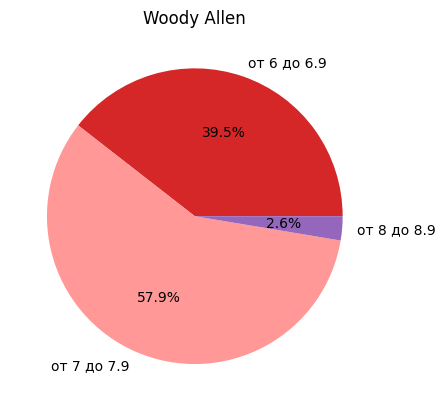

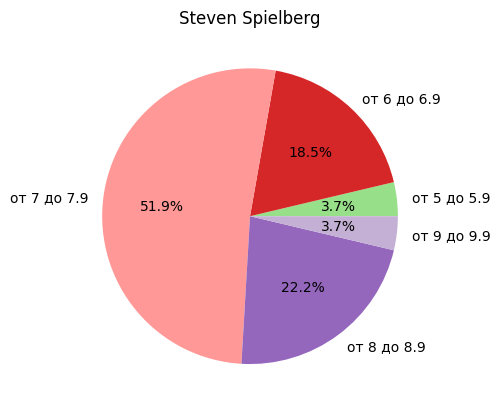

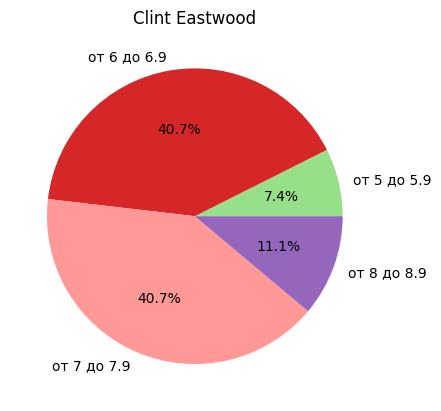

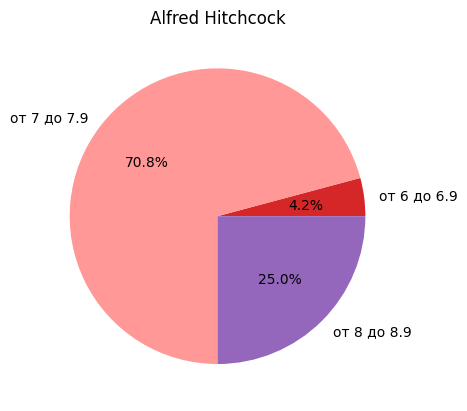

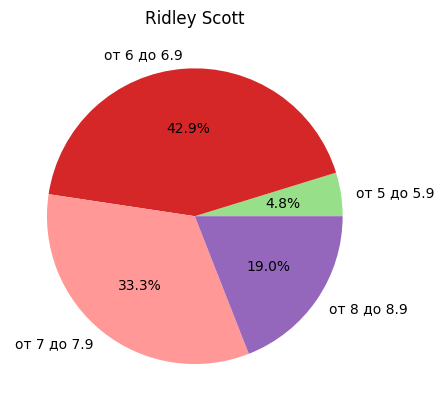

In [169]:
rating_groply = rating_counts.sort_index()[0:0.9]
i=0
while i<10:
  rating_groply['от '+str(i)+' до '+str(i+0.9)] = rating_counts.sort_index()[i:i+0.9].sum()
  i +=1
labels_rating_groply = rating_groply.index
colors_rating_groply = dict(zip(labels_rating_groply, plt.cm.tab20.colors[:len(labels_rating_groply)]))

for director in directors_top_5:
  df = dataset[dataset['director']==director]

  rating_labels = df['rating'].value_counts()

  rating_groply_director = rating_labels.sort_index()[0:0.9]
  i=0
  while i<10:
    rating_groply_director['от '+str(i)+' до '+str(i+0.9)] = rating_labels.sort_index()[i:i+0.9].sum()
    i +=1
  rating_groply_director_sorted = rating_groply_director[rating_groply_director.sort_values()!=0]

  plt.title(director)
  plt.pie(
      rating_groply_director_sorted.values,
      labels=rating_groply_director_sorted.index,
      colors=[colors_rating_groply[key] for key in rating_groply_director_sorted.index],
      autopct='%.1f%%'
      )
  plt.show()



**Выводы:**

***1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, похожи ли распределения признаков).***
Проанализировав круговые диаграммы взаимосвязи признаков "режиссер"
 и "рейтинг" можно сказать, что в Топ-3 рейтингов у всех режиссеров попали рейтинги от 6 до 8.9. В основном на первом месте группа рейтингов от 7 до 7.9. К сожалению по этой взаимосвязи мы все-таки не можем сказать, что есть четкая связь между количеством фильмов у режиссера и их высоким рейтингом, скорее  рейтинг зависит от других признаков. Также из анализа диаграмм видно, что рейтинги фильмов у данных режиссеров ниже отметки 5 не опускаются, так как для рассмотрения мы отбирали не Топ-5 рейтингов, а все ненулевые значения.

***2.   Об особенностях распределения признака в разрезе основного признака (что характерно для каждого значения основного признака)***
Что касается особенностей распределения признака "рейтинг" в разрезе признака "режиссер", то можно описать следующую ситуацию:
* *Woody Allen*: преобладают рейтинги 7-7.9(57,9%) и 6-6.9(39,5%), также присутсвует рейтинг 8-8.9(2,6%)
* *Clint Eastwood*: явного лидирования какого-то рейтинга нет, "7-7.9"(40,7%), "6-6.9"(40,7%), а также "8-8.9"(11,15%), "5-5.9"(7,4%).
* *Steven Spielberg*: доминирующим рейтингом является "7-7.9"(51.9%), "8-8.9"(22,2%), "6-6.9"(18,5%), также рейтинги "9-9.9" и "5-5.9" составляют по 3,7%; рейтинг "9-9.9" присутствует только у этого режиссера. Также это единственный режиссер у которого в Топ-рейтингах пять показателей.
* *Alfred Hitchcock*: у этого режиссера есть значительное преобладание режиссера "7-7.9"(70,83%) - из всех режиссеров, это самый большой процент распределения рейтингов, также присутствуют рейтинги "8-8.9"(25%) и "6-6.9"(4,2%).
* *Ridley Scott*: почти половину рейтингов составляет "6-6.9"(42,9%), присутсвуют еще такие рейтинги "7-7.9"(33,3%), "8-8.9"(19%), "5-5.9"(4,8%)

### *9.3. certificate - rating*

In [170]:
certificate = dataset['certificate']
certificate_counts = certificate.value_counts().sort_values(ascending=False)
certificate_counts

,count
certificate,
15,1843
12A,788
18,658
PG,614
U,362
12,277
A,186
X,134
AA,59


In [171]:
certificate_counts_top_5 = dataset['certificate'].value_counts()[:5].index
certificate_counts_top_5

Index(['15', '12A', '18', 'PG', 'U'], dtype='object', name='certificate')

In [172]:
rating_counts = dataset['rating'].value_counts().sort_values()

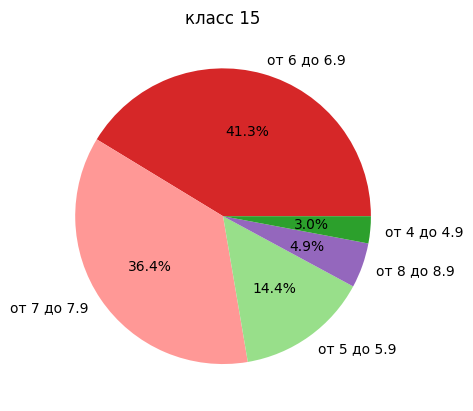

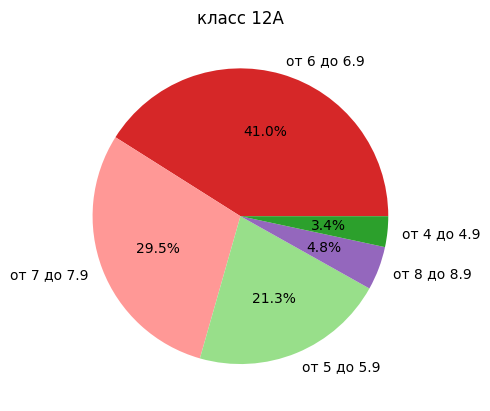

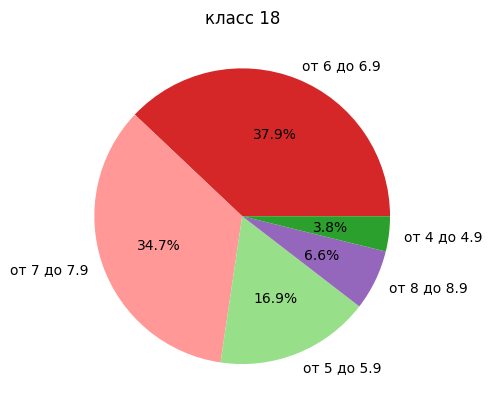

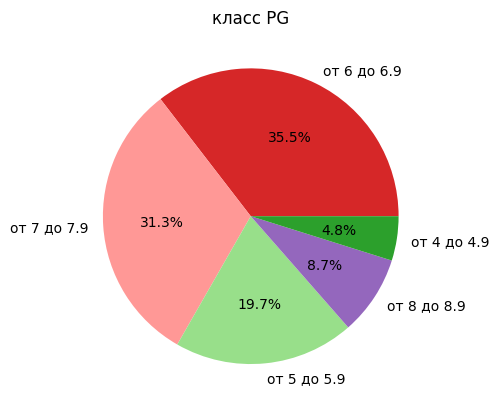

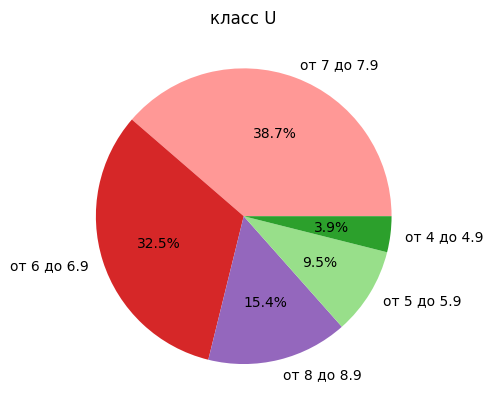

In [173]:
rating_groply = rating_counts.sort_index()[0:0.9]
i=0
while i<10:
  rating_groply['от '+str(i)+' до '+str(i+0.9)] = rating_counts.sort_index()[i:i+0.9].sum()
  i +=1
labels_rating_groply = rating_groply.index
colors_rating_groply = dict(zip(labels_rating_groply, plt.cm.tab20.colors[:len(labels_rating_groply)]))

for certificate in certificate_counts_top_5:
  df = dataset[dataset['certificate']==certificate]

  rating_labels = df['rating'].value_counts()

  rating_groply_certificate = rating_labels.sort_index()[0:0.9]
  i=0
  while i<10:
    rating_groply_certificate['от '+str(i)+' до '+str(i+0.9)] = rating_labels.sort_index()[i:i+0.9].sum()
    i +=1
  rating_groply_certificate_sorted = rating_groply_certificate.sort_values(ascending=False)[:5]

  plt.title('класс '+ certificate)
  plt.pie(
      rating_groply_certificate_sorted.values,
      labels=rating_groply_certificate_sorted.index,
      colors=[colors_rating_groply[key] for key in rating_groply_certificate_sorted.index],
      autopct='%.1f%%'
      )
  plt.show()


**Выводы:**

***1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, похожи ли распределения признаков).***
Проанализировав круговые диаграммы взаимосвязи признаков "класс рейтинга"
 и "рейтинг" можно сказать, что взаимосвязь этих признаков просматривается. Топ-5 классов - это "15"(старше 15 лет), "12А"(до 12 лет только в присутствии взрослых), "18"(старше 18 лет), "PG"(только в присутствии взрослых), "U"(для всех). У всех Топ-5 классов рейтингов одни и те же рейтинги в лидирующих показателях, хотя и есть небольшие разницы в процентных соотношения. Например первые 2 метса рейтингов занимают группы "6-6.9" и "7-7.9" в основном в объеме 30-40%. Самый меньший рейтинг во всех классах - "4-4.9" в пределах 3-5%.

***2.   Об особенностях распределения признака в разрезе основного признака (что характерно для каждого значения основного признака)***
Что касается особенностей распределения признака "класс рейтина" в разрезе признака "рейтинг", то можно описать следующую ситуацию:
* *"15"*: преобладают рейтинги "6-6.9"(41,3%) и "7-7.9"(36,4%), также присутствуют рейтинги "5-5.9", "8-8.9" и "4-4.9" с процентным распределением в 14,4%, 4,9% и 3,0% соответсвенно
* *"12А"*: доминирующим рейтингом является "6-6.9"(41%), остальные распределились таким образом "7-7.9"(29,5%), "5-5.9"(21,3%), а также "8-8.9"(4,8%), "4-4.9"(3,4%).
* *"18"*: явного преобладания одного рейтинга нет - "6-6.9"(37,9%), а "7-7.9"(34,7%), остальные - "5-5.9"(16,9%), "8-8.9"(6,6%%), "4-4.9"(3,8%)
* *"PG"*: первые значения рентингов также близки по значению - "6-6.9"(35,5%)"7-7.9"(31,3%), далее "5-5.9"(19,7%), "8-8.9"(8,7%) и "4-4.9"(4,8%).
* *"U"*: преобладают рейтинги  "7-7.9"(38,7%) "6-6.9"(32,5%), присутсвуют еще такие рейтинги , "8-8.9"(15,4%), "5-5.9"(9,5%),"4-4.9"(3,9%)

## **10. Анализ взаимосвязи количественного и категориального признаков**

### *10.1. certificate - gross_earn_clear*

In [174]:
dataset.groupby('certificate')['gross_earn_clear'].median()

,gross_earn_clear
certificate,
(Banned),<NA>
12,41.58
12A,42.65
15,18.84
18,14.945
A,16.14
AA,27.62
Not Rated,0.06
PG,44.34


In [175]:
dataset.groupby('certificate')['gross_earn_clear'].describe()

,count,mean,std,min,25%,50%,75%,max
certificate,,,,,,,,
(Banned),0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
12,269.0,60.113048,66.805332,0.04,20.55,41.58,72.22,659.33
12A,757.0,77.310925,100.261041,0.0,15.27,42.65,95.0,936.66
15,1719.0,33.451798,42.503809,0.0,3.61,18.84,45.87,363.07
18,600.0,26.6072,34.639021,0.0,2.5375,14.945,36.875,370.78
A,126.0,37.90619,50.157244,0.01,3.3925,16.14,51.245,260.0
AA,52.0,38.855769,37.479422,0.02,7.27,27.62,57.635,139.88
Not Rated,5.0,3.83,8.231376,0.01,0.02,0.06,0.51,18.55
PG,581.0,64.01136,66.772893,0.01,18.6,44.34,81.06,402.45


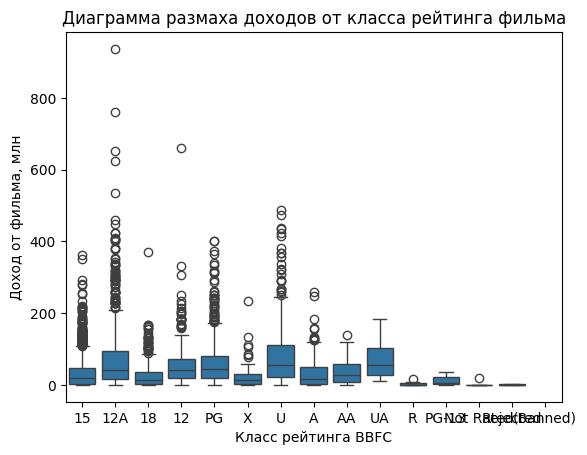

In [176]:
sns.boxplot(x='certificate', y='gross_earn_clear', data=dataset)
plt.title('Диаграмма размаха доходов от класса рейтинга фильма')
plt.ylabel('Доход от фильма, млн')
plt.xlabel('Класс рейтинга BBFC')
plt.show()

In [177]:
dataset['certificate'].value_counts()

,count
certificate,
15,1843
12A,788
18,658
PG,614
U,362
12,277
A,186
X,134
AA,59


In [178]:
certificate_list = dataset['certificate'].value_counts()[:8].index
certificate_list

Index(['15', '12A', '18', 'PG', 'U', '12', 'A', 'X'], dtype='object', name='certificate')

In [179]:
dataset_certificate_top_8 = dataset[dataset['certificate'].isin(certificate_list)]
dataset_certificate_top_8.shape

(4862, 13)

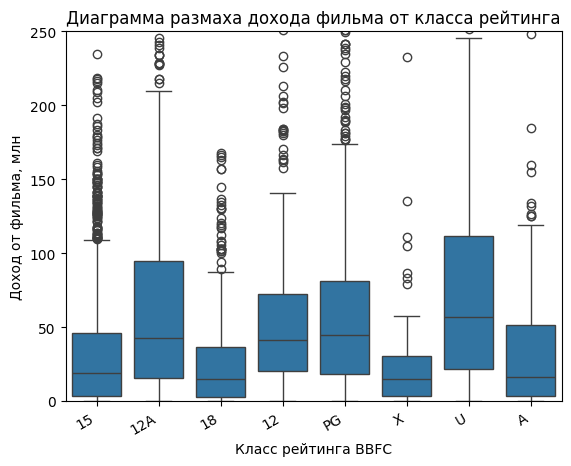

In [180]:

sns.boxplot(x='certificate', y='gross_earn_clear', data=dataset_certificate_top_8)
plt.axis(ymin=0, ymax=250)
plt.xticks(rotation=30, ha='right')
plt.title('Диаграмма размаха дохода фильма от класса рейтинга')
plt.ylabel('Доход от фильма, млн')
plt.xlabel('Класс рейтинга BBFC')
plt.show()

**Выводы:**

***1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, похожи ли распределения признаков).***
Проанализировав диаграмму размаха с группировкой признаков "доход" и "класс рейтинга" можно сказать, что какой-то определенной связи между группами классов не прослеживается. Все основные значения ждоходов всех классов сосредоточены в диапазоне от 0 до 100 млн, но их разброс хаотичен. Единственная схожесть, которую можно рассмотреть, видно на классах "Х" и "18" - скорей всего это происходит по причине, что класс "Х" более старого образца и в 1982г его заменили на класс "18", т.е по сути сравнивая эти два боксплота мы сравниваем доход фильмов с классом "старше 18 лет" которые были сняты до 1982г и после. Но сравнивая в таком же аспекте классы "А" и "PG" (в 1982г "А" заменили на "PG") мы взаимосвязи не увидим, доходы с современным классом значительно выше, в том числе и их медианное значение.
***2.   Об особенностях распределения признака в разрезе основного признака (что характерно для каждого значения основного признака).***
Оценивая доход от фильма в разрезе каждого класса можно сказать следующее:
* класс "15": основной доход сосредоточен в пределах до 50 млн, разброс доходности доходит до 170 млн, а также существуют аномальные значения более 200 млн.
* класс "Х": основная доходность в этом классе не превышает 30млн, разброс минимальный (в границах 60млн), существуют единичные выбросы.
* класс "12А": один из самых больших уровней доходов (до 100 млн), с большим разбросом значений (в пределах 200млн), а также выбросы с еще большими показателями
* класс "U": самый доходный класс рейтинга, 50% доходов в интервале от 30 до 115 млн,  разброс доходов почти до 250млн.
* класс "18": основные доходы сосредоточены в пределах 40 млн, раздрос до 80 млн
* класс "PG": основная массса доходов в интервале 20-70 млн, при этом разброс доходит до 180 млн
* класс "12": по данным похож на класс "PG" - основные доходы от 20 до 65 млн, но разброс всего лишь до 140 млн
* класс "А": основная доходность примерко как в классе "15" - до 50 млн, разброс доходов до 120 млн, существуют единичные выбросы.
***3.   О средних величинах (как распределена медиана).***
Что касается распределения медиан доходов, можно сказать следующее: самая минимальная медиана расположена на уровне 10-15 млн в классах "15", "Х", "18", "А"; далее идут классы "12А", "PG", "12" - в них медиана находится на уровне 45 млн; самое большое значение медианы в классе "U" - ее значение приблизительно 60 млн.

### *10.2. certificate - runtime_clear*

In [181]:
dataset.groupby('certificate')['runtime_clear'].describe()

,count,mean,std,min,25%,50%,75%,max
certificate,,,,,,,,
(Banned),1.0,91.0,<NA>,91.0,91.0,91.0,91.0,91.0
12,277.0,109.99278,18.842981,80.0,97.0,107.0,120.0,194.0
12A,788.0,115.449239,20.309016,75.0,100.0,112.0,127.0,213.0
15,1843.0,109.385241,18.523197,69.0,96.0,106.0,119.0,202.0
18,658.0,109.034954,21.232288,71.0,95.0,104.0,117.0,321.0
A,186.0,114.397849,26.469417,58.0,97.0,110.0,125.75,212.0
AA,59.0,114.949153,24.71592,85.0,98.0,109.0,124.5,205.0
Not Rated,7.0,103.0,17.406895,87.0,92.0,95.0,110.5,134.0
PG,614.0,110.058632,23.005847,70.0,95.0,105.0,118.0,259.0


In [182]:
dataset['certificate'].value_counts()

,count
certificate,
15,1843
12A,788
18,658
PG,614
U,362
12,277
A,186
X,134
AA,59


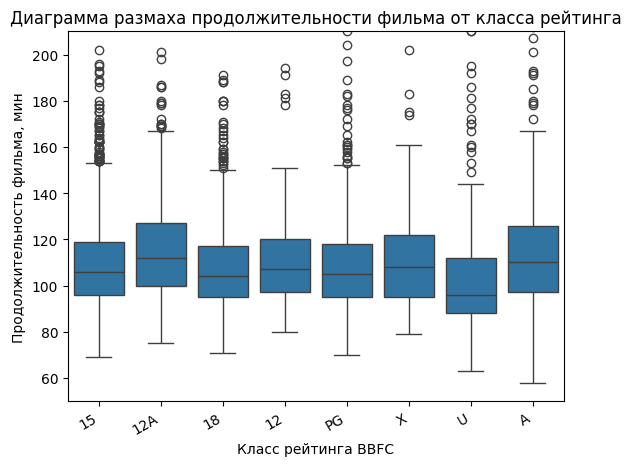

In [183]:
certificate_list = dataset['certificate'].value_counts()[:8].index

dataset_certificate_top_8 = dataset[dataset['certificate'].isin(certificate_list)]

sns.boxplot(x='certificate', y='runtime_clear', data=dataset_certificate_top_8)
plt.axis(ymin=50, ymax=210)
plt.xticks(rotation=30, ha='right')
plt.title('Диаграмма размаха продолжительности фильма от класса рейтинга')
plt.ylabel('Продолжительность фильма, мин')
plt.xlabel('Класс рейтинга BBFC')
plt.show()

**Выводы:**

***1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, похожи ли распределения признаков).***
Проанализировав диаграмму размаха с группировкой признаков "продолжительность фильма" и "класс рейтинга" можно сказать, что не смотря на то, что графики практически всех классов одинаковы, связи как таковой нет. Схожесть графиков вызвана тем, что средняя продолжительность всех фильмов и разброс значений этого параметра не зависит от того, какой класс присвоен фильму. самый маленький разброс продолжительности в классе "12", самый большой - в классе "А".

***2.   Об особенностях распределения признака в разрезе основного признака (что характерно для каждого значения основного признака).***
Оценивая доход от фильма в разрезе каждого класса можно сказать следующее:
* классы "15", "Х", "18", "PG", "12": основная масса фильмов этих классов длительностью от 95 до 120 мин, разброс в пределах 70-155 мин
* классы "12А", "А": 50% фильмов в этих классах продолжительностью от 100 до 130 мин, разброс в классе "12А" в пределах 75-165 мин, в классе "А" - 55-165 мин
* класс "U": самые низкие границы продолжительности основной массы фильмов - от 85 до 110мин, разброс длительности - 65-145 мин

***3.   О средних величинах (как распределена медиана).***
Что касается распределения медиан продолжительности в разрезе классов рейтингов, то их также можно разделить на такие же группы, как и доход в разрезе классов:
* классы "15", "Х", "18", "PG", "12": медиана на уровне 105-110 мин
* классы "12А", "А": значение медианы 116 мин
* класс "U": медианное значение самое низкое  95 мин

### *10.3. director - gross_earn_clear*

In [184]:
dataset.groupby('director')['gross_earn_clear'].describe()

,count,mean,std,min,25%,50%,75%,max
director,,,,,,,,
A.R. Murugadoss,1.0,2.43,<NA>,2.43,2.43,2.43,2.43,2.43
Aamir Khan,1.0,1.22,<NA>,1.22,1.22,1.22,1.22,1.22
Aanand L. Rai,1.0,0.88,<NA>,0.88,0.88,0.88,0.88,0.88
Aaron Blaise,1.0,85.34,<NA>,85.34,85.34,85.34,85.34,85.34
Aaron Schneider,1.0,9.18,<NA>,9.18,9.18,9.18,9.18,9.18
...,...,...,...,...,...,...,...,...
Zal Batmanglij,1.0,2.27,<NA>,2.27,2.27,2.27,2.27,2.27
Zaza Urushadze,1.0,0.14,<NA>,0.14,0.14,0.14,0.14,0.14
Zoya Akhtar,1.0,3.11,<NA>,3.11,3.11,3.11,3.11,3.11


In [185]:
dataset['director'].value_counts()

,count
director,
Woody Allen,38
Steven Spielberg,27
Clint Eastwood,27
Alfred Hitchcock,24
Ridley Scott,21
...,...
Yann Demange,1
Bruce A. Evans,1
James Gartner,1


In [186]:
dataset['director'].value_counts()>20

,count
director,
Woody Allen,True
Steven Spielberg,True
Clint Eastwood,True
Alfred Hitchcock,True
Ridley Scott,True
...,...
Yann Demange,False
Bruce A. Evans,False
James Gartner,False


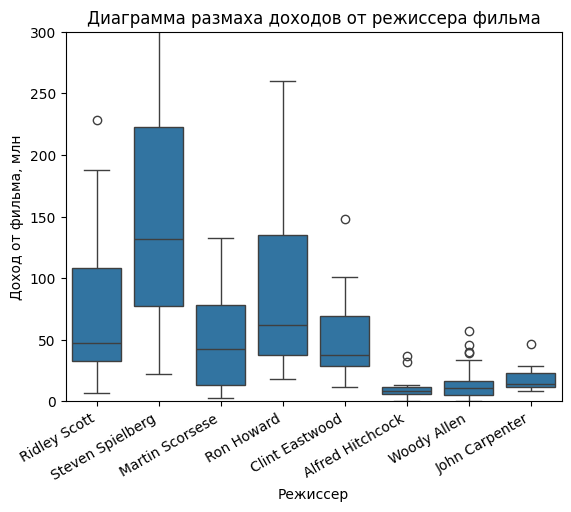

In [187]:
director_list = dataset['director'].value_counts()[:8].index

dataset_director_top_8 = dataset[dataset['director'].isin(director_list)]

sns.boxplot(x='director', y='gross_earn_clear', data=dataset_director_top_8)
plt.axis(ymin=0, ymax=300)
plt.xticks(rotation=30, ha='right')
plt.title('Диаграмма размаха доходов от режиссера фильма')
plt.ylabel('Доход от фильма, млн')
plt.xlabel('Режиссер')
plt.show()

**Выводы:**

***1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, похожи ли распределения признаков).***
Проанализировав диаграмму размаха с группировкой признаков "доход" и "режиссер" можно сказать, что взаимосвязи нет. У каждого режиссера доходность фильмов абсолютно разная.
***2.   Об особенностях распределения признака в разрезе основного признака (что характерно для каждого значения основного признака).***
Оценивая доход от фильма в разрезе каждого класса можно сказать следующее:
* Steven Spielberg: самый доходный режиссер, 50% доходов в интервале от 80 до 220 млн, разброс доходности доходит до 460 млн
* Martin Scorsese: основная доходность у этого режиссера не превышает 80 млн, начинается с 15 млн, разброс от 0 до 130 млн
* Ridley Scott: основной доход сосредоточен в пределах от 35 до 110 млн,, разброс заканчивается на границе 190млн.
* Alfred Hitchcock: самая низкая доходность из всех режиссеровсосредоточена в пределах 10-15 млн,  разброс также минимальный, до 20млн.
* Clint Eastwood: основные доходы сосредоточены в пределах 30-70 млн, разброс до 100 млн
* John Carpenter: также одна из наименьших доходностей в интервале 10-30млн, с минимальным разбросом до 35 млн.
* Ron Howard: интервал доходов 40-140млн, разброс достигает 250 млн
* Woody Allen: еще один низкодоходный режиссер в интервале 10-20млн, разбросом доходит до 40 млн.
***3.   О средних величинах (как распределена медиана).***
Что касается распределения медиан доходов в разрезе режиссеров, то они также все разные: Steven Spielberg(130 млн), Martin Scorsese(40 млн), Ridley Scott(45 млн), Alfred Hitchcock(12 млн), Clint Eastwood(35 млн), John Carpenter(20 млн), Ron Howard(60 млн), Woody Allen(12 млн).

### *10.4. director - runtime_clear*

In [188]:
dataset.groupby('director')['runtime_clear'].describe()

,count,mean,std,min,25%,50%,75%,max
director,,,,,,,,
A.R. Murugadoss,1.0,186.0,<NA>,186.0,186.0,186.0,186.0,186.0
Aamir Khan,1.0,165.0,<NA>,165.0,165.0,165.0,165.0,165.0
Aanand L. Rai,2.0,134.0,8.485281,128.0,131.0,134.0,137.0,140.0
Aaron Blaise,1.0,85.0,<NA>,85.0,85.0,85.0,85.0,85.0
Aaron Schneider,1.0,103.0,<NA>,103.0,103.0,103.0,103.0,103.0
...,...,...,...,...,...,...,...,...
Zal Batmanglij,1.0,116.0,<NA>,116.0,116.0,116.0,116.0,116.0
Zaza Urushadze,1.0,87.0,<NA>,87.0,87.0,87.0,87.0,87.0
Zoya Akhtar,1.0,155.0,<NA>,155.0,155.0,155.0,155.0,155.0


In [189]:
dataset['director'].value_counts()

,count
director,
Woody Allen,38
Steven Spielberg,27
Clint Eastwood,27
Alfred Hitchcock,24
Ridley Scott,21
...,...
Yann Demange,1
Bruce A. Evans,1
James Gartner,1


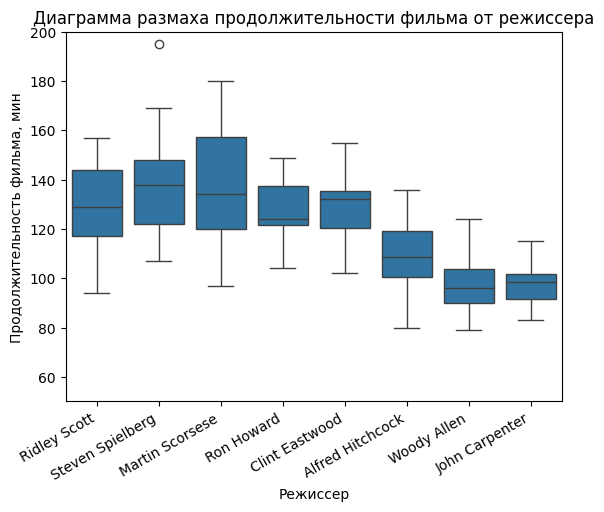

In [190]:
director_list = dataset['director'].value_counts()[:8].index

dataset_director_top_8 = dataset[dataset['director'].isin(director_list)]

sns.boxplot(x='director', y='runtime_clear', data=dataset_director_top_8)
plt.axis(ymin=50, ymax=200)
plt.xticks(rotation=30, ha='right')
plt.title('Диаграмма размаха продолжительности фильма от режиссера')
plt.ylabel('Продолжительность фильма, мин')
plt.xlabel('Режиссер')
plt.show()

**Выводы:**

***1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, похожи ли распределения признаков).***
Проанализировав диаграмму размаха с группировкой признаков "продолжительность фильма" и "режиссер" можно сказать, что взаимосвязи нет. У каждого режиссера средняя продолжительность фильма разная. Границы основной массы фиильмов схожи у Steven Spielberg и Ridley Scott (но с различным разбросом и медианой), у Clint Eastwood и Ron Howard (с похожим разбросом, но разной медианой), а также у John Carpenter и Woody Allen (с различным разбросом и медианой)

***2.   Об особенностях распределения признака в разрезе основного признака (что характерно для каждого значения основного признака).***
Оценивая продолжительность фильма в разрезе каждого режиссера можно сказать следующее:
* Steven Spielberg: основная продолжительность в интервале 120-150 мин, разброс 107-170 мин
* Martin Scorsese: интервал основной продолжительности 120-160 мин, разброс 107-170 мин
* Ridley Scott: 50% фильмов  длительностью 120-145 мин, разброс 95-155 мин
* Alfred Hitchcock: основная длительность фильма 100-120 мин, разброс 80-138 мин
* Clint Eastwood: интервал продолжительности фильмов 120-138 мин, разброс 100-157 мин
* John Carpenter: основная масса фильмов длиной от 90 до 100 мин, разброс 85-115 мин.
* Ron Howard: интервал 50% фильмов 120-140 мин, разброс 100-145 мин
* Woody Allen: основная масса фильмов с длительностью 85-100 мин, разброс 80-125 мин.

***3.   О средних величинах (как распределена медиана).***
Что касается распределения медиан продолжительности фильмов в разрезе режиссеров, то они у некоторых режиссеров схожи:
самые большие медианы - Steven Spielberg(138 мин), Martin Scorsese(135 мин), Ridley Scott(130 мин), Clint Eastwood(135 мин),
средние значения медиан - Alfred Hitchcock(110 мин), Ron Howard(125 мин),
и самые маленькие медианные значения - John Carpenter(100 мин), Woody Allen(95 мин)

### *10.5. rating - gross_earn_clear*

In [191]:
dataset.groupby('rating')['gross_earn_clear'].describe()

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
1.5,1.0,9.11,<NA>,9.11,9.11,9.11,9.11,9.11
1.9,3.0,6.38,7.192016,0.03,2.475,4.92,9.555,14.19
2.1,1.0,10.25,<NA>,10.25,10.25,10.25,10.25,10.25
2.2,1.0,17.02,<NA>,17.02,17.02,17.02,17.02,17.02
2.3,1.0,4.27,<NA>,4.27,4.27,4.27,4.27,4.27
...,...,...,...,...,...,...,...,...
8.8,6.0,220.675,155.433465,6.1,100.9175,304.06,326.5725,342.55
8.9,1.0,107.93,<NA>,107.93,107.93,107.93,107.93,107.93
9.0,5.0,214.254,230.224819,4.36,57.3,96.9,377.85,534.86


In [192]:
df_rating_gross_earn = dataset[['rating', 'gross_earn_clear']].copy()
df_rating_gross_earn.head(3)

,rating,gross_earn_clear
0,9.3,28.34
1,9.0,534.86
2,8.8,292.58


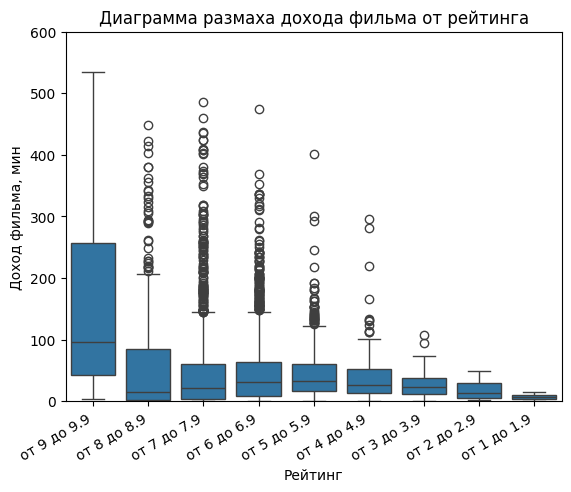

In [193]:
def rating_groply(rating, index):
  try:
    if (rating>=index and rating<(index+1)):
      return f'от {str(index)} до {str(index+0.9)}'
    else:
      return rating
  except TypeError:
    return rating

i=1
while i<10:
  df_rating_gross_earn['rating'] = df_rating_gross_earn['rating'].apply(lambda x: rating_groply(x, i))
  i +=1

sns.boxplot(x='rating', y='gross_earn_clear', data=df_rating_gross_earn)
plt.axis(ymin=0, ymax=600)
plt.xticks(rotation=30, ha='right')
plt.title('Диаграмма размаха дохода фильма от рейтинга')
plt.ylabel('Доход фильма, мин')
plt.xlabel('Рейтинг')
plt.show()

In [194]:
df_rating_gross_earn.isna().sum()

,0
rating,0
gross_earn_clear,394


In [195]:
df_rating_gross_earn

,rating,gross_earn_clear
0,от 9 до 9.9,28.34
1,от 9 до 9.9,534.86
2,от 8 до 8.9,292.58
3,от 8 до 8.9,37.03
4,от 8 до 8.9,107.93
...,...,...
4994,от 6 до 6.9,<NA>
4995,от 7 до 7.9,9.4
4996,от 5 до 5.9,<NA>
4998,от 7 до 7.9,6.67


In [196]:
df_rating_gross_earn = df_rating_gross_earn.dropna()
df_rating_gross_earn

,rating,gross_earn_clear
0,от 9 до 9.9,28.34
1,от 9 до 9.9,534.86
2,от 8 до 8.9,292.58
3,от 8 до 8.9,37.03
4,от 8 до 8.9,107.93
...,...,...
4992,от 6 до 6.9,6.24
4993,от 6 до 6.9,23.0
4995,от 7 до 7.9,9.4
4998,от 7 до 7.9,6.67


In [197]:
df_rating_gross_earn.isna().sum()

,0
rating,0
gross_earn_clear,0


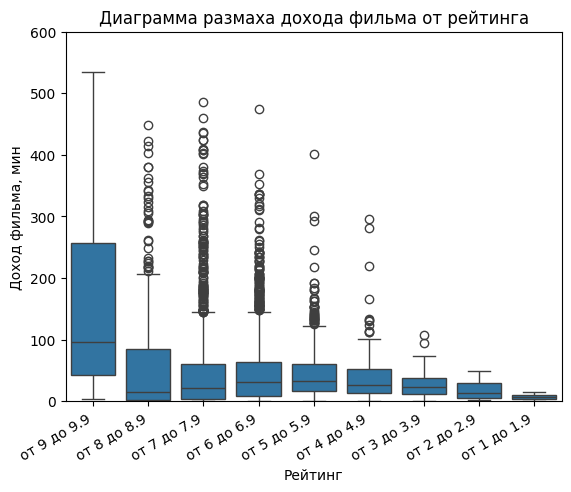

In [198]:
sns.boxplot(x='rating', y='gross_earn_clear', data=df_rating_gross_earn)
plt.axis(ymin=0, ymax=600)
plt.xticks(rotation=30, ha='right')
plt.title('Диаграмма размаха дохода фильма от рейтинга')
plt.ylabel('Доход фильма, мин')
plt.xlabel('Рейтинг')
plt.show()

**Выводы:**

***1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, похожи ли распределения признаков).***
Проанализировав диаграмму размаха с группировкой признаков "доход" и "рейтинг" можно сказать следующее. В этой взаимосвязи прослеживается явная зависимость - чем выше рейтинг фильма, тем большая его доходность, причем не только по основаной массе фильмов, но и по факту разброса доходов. Из общей массы выбиваются только рейтинги от 8 до 8.9 и от 7 до 7.9 тем, что их среднее значение и минимальная доходность ниже, чем у фильмов с меньшим рейтингом. Хотя разброс рейтинга  от 8 до 8.9 значительно больше. Можно только предположить, что этому способствовало либо неверно указанные данные доходов, либо были фильмы которые не показывали на "больших экранах" и поэтому их доход значительно меньше, хотя вне кинотератров эти фильмы были оценены высоко зрителями. Причина возможного влияния пропусков на вид графика была проверена и подтверждения не плучила (второй график построен по выборке без пропусков).

***2.   Об особенностях распределения признака в разрезе основного признака (что характерно для каждого значения основного признака).***
Оценивая доход от фильма в разрезе каждой группы рейтингов можно сказать следующее:
* от 9 до 9.9: основной доход сосредоточен в пределах от 50 до 250 млн, разброс доходности доходит до 530 млн
* от 8 до 8.9: основная доходность в этом классе не превышает 80млн, разброс до 200 млн.
* от 7 до 7.9: основная масса доходов до 60 млн, разброс значений 150млн
* от 6 до 6.9: 50% доходов в интервале от 10 до 60 млн,  разброс доходов почти до 150 млн.
* от 5 до 5.9: основные доходы сосредоточены в пределах 20-60 млн, разброс до 120 млн
* от 4 до 4.9: основная массса доходов в интервале 15-50 млн, при этом разброс доходит до 100 млн
* от 3 до 3.9: основные доходы от 15 до 40 млн, разброс всего лишь до 80 млн
* от 2 до 2.9: основная доходность 10-30 млн, разброс доходов до 50 млн.
* от 1 до 1.9: основная доходность примерно до 10 млн, разброс доходов всего лишь до 20 млн.

***3.   О средних величинах (как распределена медиана).***
Что касается распределения медиан доходов в разрезе рейтингов, можно сказать следующее: самая минимальная медиана расположена на уровне 10-15 млн в рейтингах "от 8 до 8.9", "от 2 до 2.9", "от 1 до 1.9"; далее идут классы "от 7 до 7.9", "от 6 до 6.9", "от 5 до 5.9", "от 4 до 4.9", "от 3 до 3.9" - в них медиана находится на уровне 20-30 млн; самое большое значение медианы в классе "от 9 до 9.9" - ее значение приблизительно 100 млн.

### *10.6. rating - runtime_clear*

In [199]:
dataset.groupby('rating')['runtime_clear'].describe()

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
1.5,1.0,88.0,<NA>,88.0,88.0,88.0,88.0,88.0
1.9,3.0,86.333333,5.033223,81.0,84.0,87.0,89.0,91.0
2.1,1.0,90.0,<NA>,90.0,90.0,90.0,90.0,90.0
2.2,1.0,94.0,<NA>,94.0,94.0,94.0,94.0,94.0
2.3,1.0,104.0,<NA>,104.0,104.0,104.0,104.0,104.0
...,...,...,...,...,...,...,...,...
8.8,6.0,155.666667,18.029605,139.0,143.5,148.0,170.5,179.0
8.9,1.0,154.0,<NA>,154.0,154.0,154.0,154.0,154.0
9.0,5.0,169.2,45.844302,96.0,152.0,195.0,201.0,202.0


In [200]:
df_rating_runtime = dataset[['rating', 'runtime_clear']].copy()
df_rating_runtime

,rating,runtime_clear
0,9.3,142
1,9.0,152
2,8.8,148
3,8.8,139
4,8.9,154
...,...,...
4994,6.1,93
4995,7.3,102
4996,5.9,94
4998,7.0,92


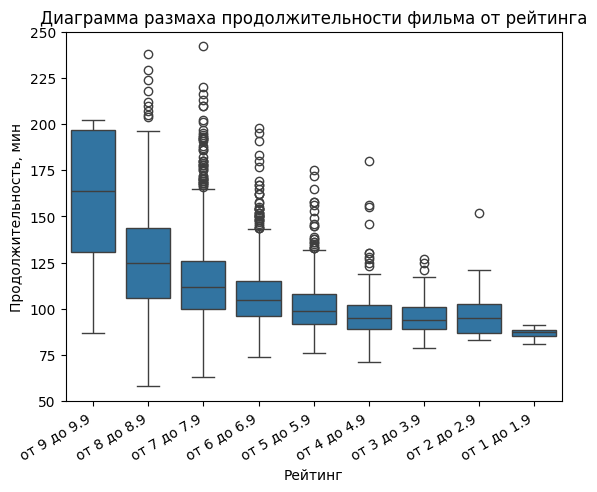

In [201]:
def rating_groply_runtime(rating, index):
  try:
    if (rating>=index and rating<(index+1)):
      return f'от {str(index)} до {str(index+0.9)}'
    else:
      return rating
  except TypeError:
    return rating

i=1
while i<10:
  df_rating_runtime['rating'] = df_rating_runtime['rating'].apply(lambda x: rating_groply_runtime(x, i))
  i +=1

sns.boxplot(x='rating', y='runtime_clear', data=df_rating_runtime)
plt.axis(ymin=50, ymax=250)
plt.xticks(rotation=30, ha='right')
plt.title('Диаграмма размаха продолжительности фильма от рейтинга')
plt.ylabel('Продолжительность, мин')
plt.xlabel('Рейтинг')
plt.show()

**Выводы:**

***1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, похожи ли распределения признаков).***
Проанализировав диаграмму размаха с группировкой признаков "доход" и "продолжительность" можно сказать следующее. В этой взаимосвязи прослеживается явная зависимость - чем выше рейтинг фильма, тем более продолжительные фильмы в основной массе признака.

***2.   Об особенностях распределения признака в разрезе основного признака (что характерно для каждого значения основного признака).***
Оценивая доход от фильма в разрезе каждой группы рейтингов можно сказать следующее:
* от 9 до 9.9: основная продолжительность сосредоточена в пределах 130-195 мин
* от 8 до 8.9: основная продолжительность в этой группе рейтингов 110-145 мин
* от 7 до 7.9: основная масса продолжительности 100-125 мин
* от 6 до 6.9: 50% продолжительности в интервале от 95 до 120 мин
* от 5 до 5.9: основная продолжительность сосредоточена в пределах 90-115 мин
* от 4 до 4.9: основная массса продолжительности в интервале 88-110 мин
* от 3 до 3.9: основная продолжительность от 88 до 110 мин
* от 2 до 2.9: основная продолжительность 85-112 мин.
* от 1 до 1.9: основная продолжительность примерно от 80 до 85 мин

***3.   О средних величинах (как распределена медиана).***
Что касается распределения медиан доходов в разрезе групп рейтингов, можно сказать следующее: самая минимальная медиана расположена на уровне 80-95 мин в рейтингах "от 4 до 4.9", "от 3 до 3.9", "от 2 до 2.9", "от 1 до 1.9"; далее идут классы "от 8 до 8.9", "от 7 до 7.9", "от 6 до 6.9", "от 5 до 5.9"  - в них медиана находится на уровне 110-125 мин; самое большое значение медианы в классе "от 9 до 9.9" - ее значение приблизительно 165 мин.

## **11. Общий вывод**

Рассмотрев и проанализировав предоставленную выборку с данными о 5000 фильмов, имеющих наибольший рейтинг на сайте IMDb, можно сформулировать следующие выводы.

***1.   Неграфический и графический анализ количественных признаков.***
* **по признаку "доход с фильма"**: было принято решение удалить нулевые значения;, максимальное значение - 936.66 млн, минимальное - 0.01 млн, средний доход с фильма - 49.08 млн, медианное значение - 28.35 млн, 50% всех исследуемых данных лежит в диапазоне от 7 млн до 63.04 млн. В ходе графического анализа были выявлены экстремальные значения, которые также были удалены. По итогу можно сделать выводы, что основная масса фильмов имеет доход не более 60 млн и больше всего фильмов с низким доходом.
* **по признаку " продолжительность фильма "**: нулевых значений не было; максимальное значение – 366 мин, минимальное – 45 мин, средняя продолжительность фильма – 110 мин, медианное значение – 106 мин, 50% всех исследуемых данных лежит в диапазоне от 96 мин до 120 мин. В ходе графического анализа были выявлены экстремальные значения, которые были удалены. По итогу можно сделать выводы, что больше всего фильмов продолжительность которых от 1 до 2,5 часов, также можно сказать, что чем длиннее фильм, тем таких фильмов меньше.

***2.   Неграфический и графический анализ категориальных признаков.***
* **по признаку "класс рейтинга"**: уникальных значений – 15 шт, топ-класс «15» встречается 1843 раза, наиболее встречающиеся значения классов - "15", "12А", "18", "PG", "U", меньше всего фильмов с классами - "PG-13", "UA", "R", "AA", также в отдельную группу (которую оставили без рассмотрения) можно отнести фильмы с классами "Banned", "Rejected", "Not Rated", в связи с тем, что такого рейтинга по классификации BBFC не существует. В ходе графического анализа выявлено, что доли классов распределились следующим образом: "15" - 37.1%, "12A" - 15,9%, "18" - 13,2%, "PG" – 12,4%, "U" – 7,3%, \остальные классы – 14,2%.
* **по признаку "рейтинг"**: уникальных значений – 72 шт, топ-рейтинг «6.7» встречается 221 раз, наиболее встречающиеся рейтинги - 6.7 (221 фильм), 6.4 (218 фильмов), 6.6 (209 фильмов), 7.2 (207 фильмов), 7.0 (206 фильмов), меньше всего фильмов с рейтингами 1.5, 2.2, 2.1, 8.9, 2.3, 9.3, фильмов с таким рейтингом всего лишь по 1шт. В ходе графического анализа выявлено, что больше всего фильмов с рейтингом в интервале от 5.0 до 8.5. Для более подробного анализа было принято решение разделить рейтинги на 10 групп, тем самым сделать признак однозначно категориальным и более анализируемым. Благодаря этому, стало видно, что в Топ-3 входят такие группы: 6.0-6.9, 7.0-7.9, 5.0-5.9. В процентом соотношении: 6.0-6.9 - 37.9%, 7.0-7.9 - 33.7%, 5.0-5.9 - 16.0%, остальные рейтинги составляют меньше 10% каждый (8.0-9.0 - 7.3%, 4.0-5.0 - 3.7%, все оставшиеся - 1.4%).
* **по признаку "режиссер"**: уникальных значений – 1954 шт, топ-режиссер Woody Allen встречается 38 раз, наиболее встречающиеся режиссеры - Woody Allen (38 фильма), Clint Eastwood (27 фильмов), Steven Spielberg (27 фильмов), Alfred Hitchcock (24 фильмов), Ridley Scott (21 фильмов), также мы выяснили, что в выборке представлено большое количество режиссеров, которые представлены только с одном фильмом (1006 чел). В ходе графического анализа (рассматривали Топ-5 режиссеров) получили такое процентное соотношение: Woody Allen - 27.7%, Clint Eastwood - 19.7%, Steven Spielberg - 19.7%, Alfred Hitchcock - 17.5%, Ridley Scott -15.3%.

***3.   Анализ взаимосвязи двух количественных признаков.***
* **"продолжительность фильма"–"доход с фильма"**: из анализа этих двух признаков видно, что какой-то четкой взаимосвязи выручки фильма от его продолжительности не существует.

***4.   Анализ взаимосвязи двух категориальных признаков.***
* **"режиссер"–"класс рейтинга"**: четкой взаимосвязи между признаками нет. Было принято решение, привести классы к единой современной классификации (сделаны следующие замены: 'AA'->'15', 'A'->'PG', 'X'->'18'). Из анализа графиков диаграмм, можно сделать выводы, что в Топ-3 классов всех режиссеров есть классы "15"(для детей старше 15 лет) и "12А"(для детей до 12 лет в присутствии взрослых) ("12А" кроме Alfred Hitchcock). Также класс рейтинга "U"(для всех) в Топ-5 классов попали фильмы только режиссера Steven Spielberg. Единственной взаимосвязью между всем Топ-5 режиссеров является то, что у всех в Топ-5 классов есть класс рейтинга "15"(для детей старше 15 лет) и "PG"(для просмотра в присутствии взрослых). Что касается особенностей распределения признака "класса рейтинга" в разрезе признака "режиссер", то можно описать следующую ситуацию: *Woody Allen*: преобладают классы "12A"(29,7%), "15"(29,7%), "PG"(27%), также присутствуют классы "12"(8,1%) и "18"(5,4%); *Clint Eastwood*: доминирующим классом является "15"(65.4%), классы "12А" и "18" составляют по 11.5%, также в топ-5 попали классы "PG"(7,7%) и "12"(3,8%); *Steven Spielberg*: явного лидирования какого-то класса нет, "PG"(37%), "12А"(29,6%), "15"(18,5%), "12"(7,4%) и "U"(7,4%) - из всех топ-5 режиссеров, только у Steven Spielberg есть этот класс.; *Alfred Hitchcock*: у этого режиссера есть значительное преобладание класса "PG"(83,3%) - из всех режиссеров, это самый большой процент распределения классов, также присутствуют классы "18"(12,5%) и "15"(4,2%). Также это единственный режиссер у которого в Топ-классах всего три показателя; *Ridley Scott*: почти половину классов составляет "15"(42,9%), классы "18" и "12А" занимают по 23,8%, а классы "12" и "PG" - по 4,8%.
* **"режиссер"–"рейтинг"**: точно сказать нельзя, что есть четкая связь между количеством фильмов у режиссера и их высоким рейтингом, скорее  рейтинг зависит от других признаков, но выявлено, что в Топ-3 рейтингов у всех режиссеров попали рейтинги от 6 до 8.9. В основном на первом месте группа рейтингов от 7 до 7.9 и ниже отметки 5 рейтинги не опускаются. Что касается особенностей распределения признака "рейтинг" в разрезе признака "режиссер", то можно описать следующую ситуацию: *Woody Allen*: преобладают рейтинги 7-7.9(57,9%) и 6-6.9(39,5%), также присутствует рейтинг 8-8.9(2,6%); *Clint Eastwood*: явного лидирования какого-то рейтинга нет, "7-7.9"(40,7%), "6-6.9"(40,7%), а также "8-8.9"(11,15%), "5-5.9"(7,4; *Steven Spielberg*: доминирующим рейтингом является "7-7.9"(51.9%), "8-8.9"(22,2%), "6-6.9"(18,5%), также рейтинги "9-9.9" и "5-5.9" составляют по 3,7%; рейтинг "9-9.9" присутствует только у этого режиссера. Также это единственный режиссер у которого в Топ-рейтингах пять показателей; *Alfred Hitchcock*: у этого режиссера есть значительное преобладание режиссера "7-7.9"(70,83%) - из всех режиссеров, это самый большой процент распределения рейтингов, также присутствуют рейтинги "8-8.9"(25%) и "6-6.9"(4,2; *Ridley Scott*: почти половину рейтингов составляет "6-6.9"(42,9%), присутствуют еще такие рейтинги "7-7.9"(33,3%), "8-8.9"(19%), "5-5.9"(4,8%).
* **"класс рейтинга"–"рейтинг"**: можно сказать, что взаимосвязь этих признаков просматривается. Топ-5 классов - это "15"(старше 15 лет), "12А"(до 12 лет только в присутствии взрослых), "18"(старше 18 лет), "PG"(только в присутствии взрослых), "U"(для всех). У всех Топ-5 классов рейтингов одни и те же рейтинги в лидирующих показателях (первые 2 места рейтингов занимают группы "6-6.9" и "7-7.9" в основном в объеме 30-40%, самый меньший рейтинг во всех классах - "4-4.9" в пределах 3-5%). Что касается особенностей распределения признака "класс рейтинга" в разрезе признака "рейтинг", то можно описать следующую ситуацию:  *"15"*: преобладают рейтинги "6-6.9"(41,3%) и "7-7.9"(36,4%), также присутствуют рейтинги "5-5.9", "8-8.9" и "4-4.9" с процентным распределением в 14,4%, 4,9% и 3,0% соответственно; *"12А"*: доминирующим рейтингом является "6-6.9"(41%), остальные распределились таким образом "7-7.9"(29,5%), "5-5.9"(21,3%), а также "8-8.9"(4,8%), "4-4.9"(3,4; *"18"*: явного преобладания одного рейтинга нет - "6-6.9"(37,9%), а "7-7.9"(34,7%), остальные - "5-5.9"(16,9%), "8-8.9"(6,6%%), "4-4.9"(3,8%); *"PG"*: первые значения рентингов также близки по значению - "6-6.9"(35,5%)"7-7.9"(31,3%), далее "5-5.9"(19,7%), "8-8.9"(8,7%) и "4-4.9"(4,8;*"U"*: преобладают рейтинги  "7-7.9"(38,7%) "6-6.9"(32,5%), присутствуют еще такие рейтинги , "8-8.9"(15,4%), "5-5.9"(9,5%),"4-4.9"(3,9%)

***5.   Анализ взаимосвязи количественного и категориального признаков.***
* **"класс рейтинга"–"доход с фильма"**: определенной связи между группами классов не прослеживается, все основные значения доходов всех классов сосредоточены в диапазоне от 0 до 100 млн, но их разброс хаотичен. Оценивая доход от фильма в разрезе каждого класса можно сказать следующее:
класс "15": основной доход сосредоточен в пределах до 50 млн, разброс доходности доходит до 170 млн, а также существуют аномальные значения более 200 млн;  класс "Х": основная доходность в этом классе не превышает 30млн, разброс минимальный (в границах 60млн), существуют единичные выбросы; класс "12А": один из самых больших уровней доходов (до 100 млн), с большим разбросом значений (в пределах 200млн), а также выбросы с еще большими показателями; класс "U": самый доходный класс рейтинга, 50% доходов в интервале от 30 до 115 млн,  разброс доходов почти до 250млн; класс "18": основные доходы сосредоточены в пределах 40 млн, раздрос до 80 млн;  класс "PG": основная массса доходов в интервале 20-70 млн, при этом разброс доходит до 180 млн;  класс "12": по данным похож на класс "PG" - основные доходы от 20 до 65 млн, но разброс всего лишь до 140 млн; класс "А": основная доходность примерно как в классе "15" - до 50 млн, разброс доходов до 120 млн, существуют единичные выбросы. Что касается распределения медиан доходов, можно сказать следующее: самая минимальная медиана расположена на уровне 10-15 млн в классах "15", "Х", "18", "А"; далее идут классы "12А", "PG", "12" - в них медиана находится на уровне 45 млн; самое большое значение медианы в классе "U" - ее значение приблизительно 60 млн.
* **"класс рейтинга"–"продолжительность фильма"**: несмотря на то, что графики практически всех классов одинаковы, связи как таковой нет. Схожесть графиков вызвана тем, что средняя продолжительность всех фильмов и разброс значений этого параметра не зависит от того, какой класс присвоен фильму. самый маленький разброс продолжительности в классе "12", самый большой - в классе "А". Оценивая доход от фильма в разрезе каждого класса можно сказать следующее:  классы "15", "Х", "18", "PG", "12": основная масса фильмов этих классов длительностью от 95 до 120 мин, разброс в пределах 70-155 мин;  "12А", "А": 50% фильмов в этих классах продолжительностью от 100 до 130 мин, разброс в классе "12А" в пределах 75-165 мин, в классе "А" - 55-165 мин; класс "U": самые низкие границы продолжительности основной массы фильмов - от 85 до 110мин, разброс длительности - 65-145 мин. Что касается распределения медиан продолжительности в разрезе классов рейтингов, то их также можно разделить на такие же группы, как и доход в разрезе классов: классы "15", "Х", "18", "PG", "12": медиана на уровне 105-110 мин; классы "12А", "А": значение медианы 116 мин; класс "U": медианное значение самое низкое  95 мин
* **"режиссер"–"доход с фильма"**: взаимосвязи между этими признаками нет, у каждого режиссера доходность фильмов абсолютно разная. Оценивая доход от фильма в разрезе каждого класса можно сказать следующее: Steven Spielberg: самый доходный режиссер, 50% доходов в интервале от 80 до 220 млн, разброс доходности доходит до 460 млн; Martin Scorsese: основная доходность у этого режиссера не превышает 80 млн, начинается с 15 млн, разброс от 0 до 130 млн; Ridley Scott: основной доход сосредоточен в пределах от 35 до 110 млн,, разброс заканчивается на границе 190млн; Alfred Hitchcock: самая низкая доходность из всех режиссеровсосредоточена в пределах 10-15 млн,  разброс также минимальный, до 20млн; Clint Eastwood: основные доходы сосредоточены в пределах 30-70 млн, разброс до 100 млн; John Carpenter: также одна из наименьших доходностей в интервале 10-30млн, с минимальным разбросом до 35 млн;  Ron Howard: интервал доходов 40-140млн, разброс достигает 250 млн; Woody Allen: еще один низкодоходный режиссер в интервале 10-20млн, разбросом доходит до 40 млн. Что касается распределения медиан доходов в разрезе режиссеров, то они также все разные: Steven Spielberg(130 млн), Martin Scorsese(40 млн), Ridley Scott(45 млн), Alfred Hitchcock(12 млн), Clint Eastwood(35 млн), John Carpenter(20 млн), Ron Howard(60 млн), Woody Allen(12 млн).
* **"режиссер"–"продолжительность фильма"**: можду признаками взаимосвязи нет, у каждого режиссера средняя продолжительность фильма разная. Границы основной массы фильмов схожи у Steven Spielberg и Ridley Scott (но с различным разбросом и медианой), у Clint Eastwood и Ron Howard (с похожим разбросом, но разной медианой), а также у John Carpenter и Woody Allen (с различным разбросом и медианой). Оценивая продолжительность фильма в разрезе каждого режиссера можно сказать следующее: Steven Spielberg: основная продолжительность в интервале 120-150 мин, разброс 107-170 мин;  Martin Scorsese: интервал основной продолжительности 120-160 мин, разброс 107-170 мин; Ridley Scott: 50% фильмов  длительностью 120-145 мин, разброс 95-155 мин; Alfred Hitchcock: основная длительность фильма 100-120 мин, разброс 80-138 мин; Clint Eastwood: интервал продолжительности фильмов 120-138 мин, разброс 100-157 мин; John Carpenter: основная масса фильмов длиной от 90 до 100 мин, разброс 85-115 мин; Ron Howard: интервал 50% фильмов 120-140 мин, разброс 100-145 мин; Woody Allen: основная масса фильмов с длительностью 85-100 мин, разброс 80-125 мин. Что касается распределения медиан продолжительности фильмов в разрезе режиссеров, то они у некоторых режиссеров схожи: самые большие медианы - Steven Spielberg(138 мин), Martin Scorsese(135 мин), Ridley Scott(130 мин), Clint Eastwood(135 мин), средние значения медиан - Alfred Hitchcock(110 мин), Ron Howard(125 мин) и самые маленькие медианные значения - John Carpenter(100 мин), Woody Allen(95 мин)
* **"рейтинг"–"доход с фильма"**: в этой взаимосвязи прослеживается явная зависимость - чем выше рейтинг фильма, тем большая его доходность, причем не только по основной массе фильмов, но и по факту разброса доходов. Из общей массы выбиваются только рейтинги от 8 до 8.9 и от 7 до 7.9 тем, что их среднее значение и минимальная доходность ниже, чем у фильмов с меньшим рейтингом. Можно только предположить, что этому способствовало либо неверно указанные данные доходов, либо были фильмы которые не показывали на "больших экранах" и поэтому их доход значительно меньше, хотя вне кинотеатров эти фильмы были оценены высоко зрителями. Причина возможного влияния пропусков на вид графика была проверена и подтверждения не получила (построен дополнительный график по выборке без пропусков). Оценивая доход от фильма в разрезе каждой группы рейтингов можно сказать следующее: от 9 до 9.9: основной доход сосредоточен в пределах от 50 до 250 млн, разброс доходности доходит до 530 млн; от 8 до 8.9: основная доходность в этом классе не превышает 80млн, разброс до 200 млн;  от 7 до 7.9: основная масса доходов до 60 млн, разброс значений 150млн; от 6 до 6.9: 50% доходов в интервале от 10 до 60 млн,  разброс доходов почти до 150 млн; от 5 до 5.9: основные доходы сосредоточены в пределах 20-60 млн, разброс до 120 млн; от 4 до 4.9: основная массса доходов в интервале 15-50 млн, при этом разброс доходит до 100 млн; от 3 до 3.9: основные доходы от 15 до 40 млн, разброс всего лишь до 80 млн; от 2 до 2.9: основная доходность 10-30 млн, разброс доходов до 50 млн; от 1 до 1.9: основная доходность примерно до 10 млн, разброс доходов всего лишь до 20 млн. Что касается распределения медиан доходов в разрезе рейтингов, можно сказать следующее: самая минимальная медиана расположена на уровне 10-15 млн в рейтингах "от 8 до 8.9", "от 2 до 2.9", "от 1 до 1.9"; далее идут классы "от 7 до 7.9", "от 6 до 6.9", "от 5 до 5.9", "от 4 до 4.9", "от 3 до 3.9" - в них медиана находится на уровне 20-30 млн; самое большое значение медианы в классе "от 9 до 9.9" - ее значение приблизительно 100 млн.
* **"рейтинг"–"продолжительность фильма"**: в этой взаимосвязи прослеживается явная зависимость - чем выше рейтинг фильма, тем более продолжительные фильмы в основной массе признака. Оценивая доход от фильма в разрезе каждой группы рейтингов можно сказать следующее:  от 9 до 9.9: основная продолжительность сосредоточена в пределах 130-195 мин; от 8 до 8.9: основная продолжительность в этой группе рейтингов 110-145 мин;  от 7 до 7.9: основная масса продолжительности 100-125 мин; от 6 до 6.9: 50% продолжительности в интервале от 95 до 120 мин; от 5 до 5.9: основная продолжительность сосредоточена в пределах 90-115 мин; от 4 до 4.9: основная массса продолжительности в интервале 88-110 мин; от 3 до 3.9: основная продолжительность от 88 до 110 мин;  от 2 до 2.9: основная продолжительность 85-112 мин; от 1 до 1.9: основная продолжительность примерно от 80 до 85 мин. Что касается распределения медиан доходов в разрезе групп рейтингов, можно сказать следующее: самая минимальная медиана расположена на уровне 80-95 мин в рейтингах "от 4 до 4.9", "от 3 до 3.9", "от 2 до 2.9", "от 1 до 1.9"; далее идут классы "от 8 до 8.9", "от 7 до 7.9", "от 6 до 6.9", "от 5 до 5.9"  - в них медиана находится на уровне 110-125 мин; самое большое значение медианы в классе "от 9 до 9.9" - ее значение приблизительно 165 мин.
